In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
import functions as f 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
%config InlineBackend.figure_format='retina'



In [2]:
blue = sns.color_palette()[0]

In [3]:
df = pd.read_pickle('data/rent_cleaned.pkl')

In [4]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651885 entries, 0 to 2651884
Data columns (total 73 columns):
 #   Column                            Non-Null Count    Dtype         
---  ------                            --------------    -----         
 0   obid                              2651885 non-null  int64         
 1   mietekalt                         2651885 non-null  float64       
 2   nebenkosten                       2490467 non-null  float64       
 3   heizkosten                        824489 non-null   float64       
 4   baujahr                           1682820 non-null  float64       
 5   letzte_modernisierung             556602 non-null   float64       
 6   wohnflaeche                       2651885 non-null  float64       
 7   nutzflaeche                       630468 non-null   float64       
 8   etage                             2167254 non-null  float64       
 9   anzahletagen                      1605995 non-null  float64       
 10  zimmeranzahl      

In [5]:
df.select_dtypes('float').info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651885 entries, 0 to 2651884
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   mietekalt              2651885 non-null  float64
 1   nebenkosten            2490467 non-null  float64
 2   heizkosten             824489 non-null   float64
 3   baujahr                1682820 non-null  float64
 4   letzte_modernisierung  556602 non-null   float64
 5   wohnflaeche            2651885 non-null  float64
 6   nutzflaeche            630468 non-null   float64
 7   etage                  2167254 non-null  float64
 8   anzahletagen           1605995 non-null  float64
 9   zimmeranzahl           2651445 non-null  float64
 10  schlafzimmer           1372067 non-null  float64
 11  badezimmer             1756338 non-null  float64
 12  ev_kennwert            800264 non-null   float64
 13  click_customer         1446675 non-null  float64
 14  rent_sqm          

In [6]:
df.ausstattung.value_counts(dropna=False)

NaN        1550469
Normal      523163
Gehoben     505691
Luxus        54878
Einfach      17684
Name: ausstattung, dtype: int64

In [6]:
columns = ['wohnflaeche', 'mietekalt',
       'aufzug', 'balkon',
       'einbaukueche', 'ev_wwenthalten', 'foerderung', 'gaestewc', 'garten',
       'heizkosten_in_wm_enthalten', 'keller', 'parkplatz', 'rollstuhlgerecht',
       'ausstattung', 'energieausweistyp',
       'haustier_erlaubt', 'heizungsart', 'kategorie_Wohnung', 'objektzustand',
       'anbieter',
       'Wärmezufuhr', 'Erdgas leicht', 'Erdgas schwer',
       'keine Information', 'Windenergie', 'Pellets', 'Solarenergie', 'Koks',
       'kombinierte erneuerbare Energie', 'Erdwärme', 'Bioenergie',
       'Wasserenergie', 'Nahwärme', 'Fernwärme', 'Holzschnitzel', 'Öl',
       'kombinierte regenerative Energie', 'Kohle',
       'kombinierte Fossilkraftstoffe', 'Gas', 'Holz', 'Heizdampf-Fernwärme',
       'thermische Umweltenergie', 'Flüssiggas', 'kombinierte Bio Energie',
       'Elektro']

In [7]:
clustering_df = df[columns]

In [8]:
clustering_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651885 entries, 0 to 2651884
Data columns (total 46 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   wohnflaeche                       2651885 non-null  float64
 1   mietekalt                         2651885 non-null  float64
 2   aufzug                            2651885 non-null  bool   
 3   balkon                            2651885 non-null  bool   
 4   einbaukueche                      2651885 non-null  bool   
 5   ev_wwenthalten                    2651885 non-null  bool   
 6   foerderung                        2651885 non-null  bool   
 7   gaestewc                          2651885 non-null  bool   
 8   garten                            2651885 non-null  bool   
 9   heizkosten_in_wm_enthalten        2651885 non-null  bool   
 10  keller                            2651885 non-null  bool   
 11  parkplatz                         265

In [9]:
clustering_df.ausstattung.value_counts(dropna=False)

NaN        1550469
Normal      523163
Gehoben     505691
Luxus        54878
Einfach      17684
Name: ausstattung, dtype: int64

In [10]:
X, _ = f.clean_data(clustering_df)

In [11]:
X.columns

Index(['wohnflaeche', 'mietekalt', 'aufzug', 'balkon', 'einbaukueche',
       'ev_wwenthalten', 'foerderung', 'gaestewc', 'garten',
       'heizkosten_in_wm_enthalten', 'keller', 'parkplatz', 'rollstuhlgerecht',
       'haustier_erlaubt', 'Wärmezufuhr', 'Erdgas leicht', 'Erdgas schwer',
       'keine Information', 'Windenergie', 'Pellets', 'Solarenergie', 'Koks',
       'kombinierte erneuerbare Energie', 'Erdwärme', 'Bioenergie',
       'Wasserenergie', 'Nahwärme', 'Fernwärme', 'Holzschnitzel', 'Öl',
       'kombinierte regenerative Energie', 'Kohle',
       'kombinierte Fossilkraftstoffe', 'Gas', 'Holz', 'Heizdampf-Fernwärme',
       'thermische Umweltenergie', 'Flüssiggas', 'kombinierte Bio Energie',
       'Elektro', 'ausstattung_Einfach', 'ausstattung_Gehoben',
       'ausstattung_Luxus', 'ausstattung_Normal', 'ausstattung_nan',
       'energieausweistyp_Endenergiebedarf',
       'energieausweistyp_Energieverbrauchskennwert', 'energieausweistyp_nan',
       'heizungsart_Blockheizkr

In [12]:
X.ausstattung_nan.sum()

1550469

### Principal Component Analysis 

In [13]:
from sklearn.preprocessing import Normalizer

In [14]:
normalizer = Normalizer()
normalized_values = normalizer.fit_transform(X)

In [15]:
normalized_values

array([[1.61929863e-01, 9.86760101e-01, 2.53015411e-03, ...,
        0.00000000e+00, 0.00000000e+00, 2.53015411e-03],
       [1.54734276e-01, 9.87918840e-01, 2.38052732e-03, ...,
        0.00000000e+00, 0.00000000e+00, 2.38052732e-03],
       [1.40262248e-01, 9.90086456e-01, 2.06268012e-03, ...,
        0.00000000e+00, 0.00000000e+00, 2.06268012e-03],
       ...,
       [6.10287181e-02, 9.98133240e-01, 5.70361852e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.09971585e-02, 9.98135321e-01, 5.54519623e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.77232365e-02, 9.98858439e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [16]:
%%time
from sklearn.decomposition import PCA

# One less as original feature number
N_COMPONENTS = clustering_df.shape[1] - 1


pca = PCA(n_components=N_COMPONENTS)
pca.fit(normalized_values)

print('explained_variance_ratio_ vector:', pca.explained_variance_ratio_)
print('explained_variance_ratio_ sum:', pca.explained_variance_ratio_.sum())



explained_variance_ratio_ vector: [9.84789881e-01 3.27981549e-03 1.45530655e-03 1.13569343e-03
 1.02522993e-03 7.48129109e-04 6.77838619e-04 6.41830133e-04
 5.78319476e-04 5.11554469e-04 4.76322464e-04 4.05555060e-04
 3.79914700e-04 3.50614145e-04 2.91752262e-04 2.89892099e-04
 2.77717889e-04 2.65218828e-04 2.59412825e-04 2.47406826e-04
 2.19190730e-04 1.95941386e-04 1.84132107e-04 1.59275760e-04
 1.50340546e-04 1.15586117e-04 1.08431004e-04 9.42447049e-05
 8.53124563e-05 7.14257991e-05 5.23296413e-05 4.76831834e-05
 4.05936525e-05 3.82134857e-05 3.67354300e-05 3.07147995e-05
 2.89193736e-05 2.70363711e-05 2.46438155e-05 2.15121624e-05
 2.12059486e-05 1.94046264e-05 1.90813502e-05 1.83158509e-05
 1.38374796e-05]
explained_variance_ratio_ sum: 0.9999115128605077
CPU times: user 1min 25s, sys: 44.4 s, total: 2min 9s
Wall time: 44.7 s


In [17]:
s = pd.DataFrame(pca.singular_values_)
v = pd.DataFrame(pca.components_)

In [20]:
f.explained_variance(s, 1)

0.9848770297255551

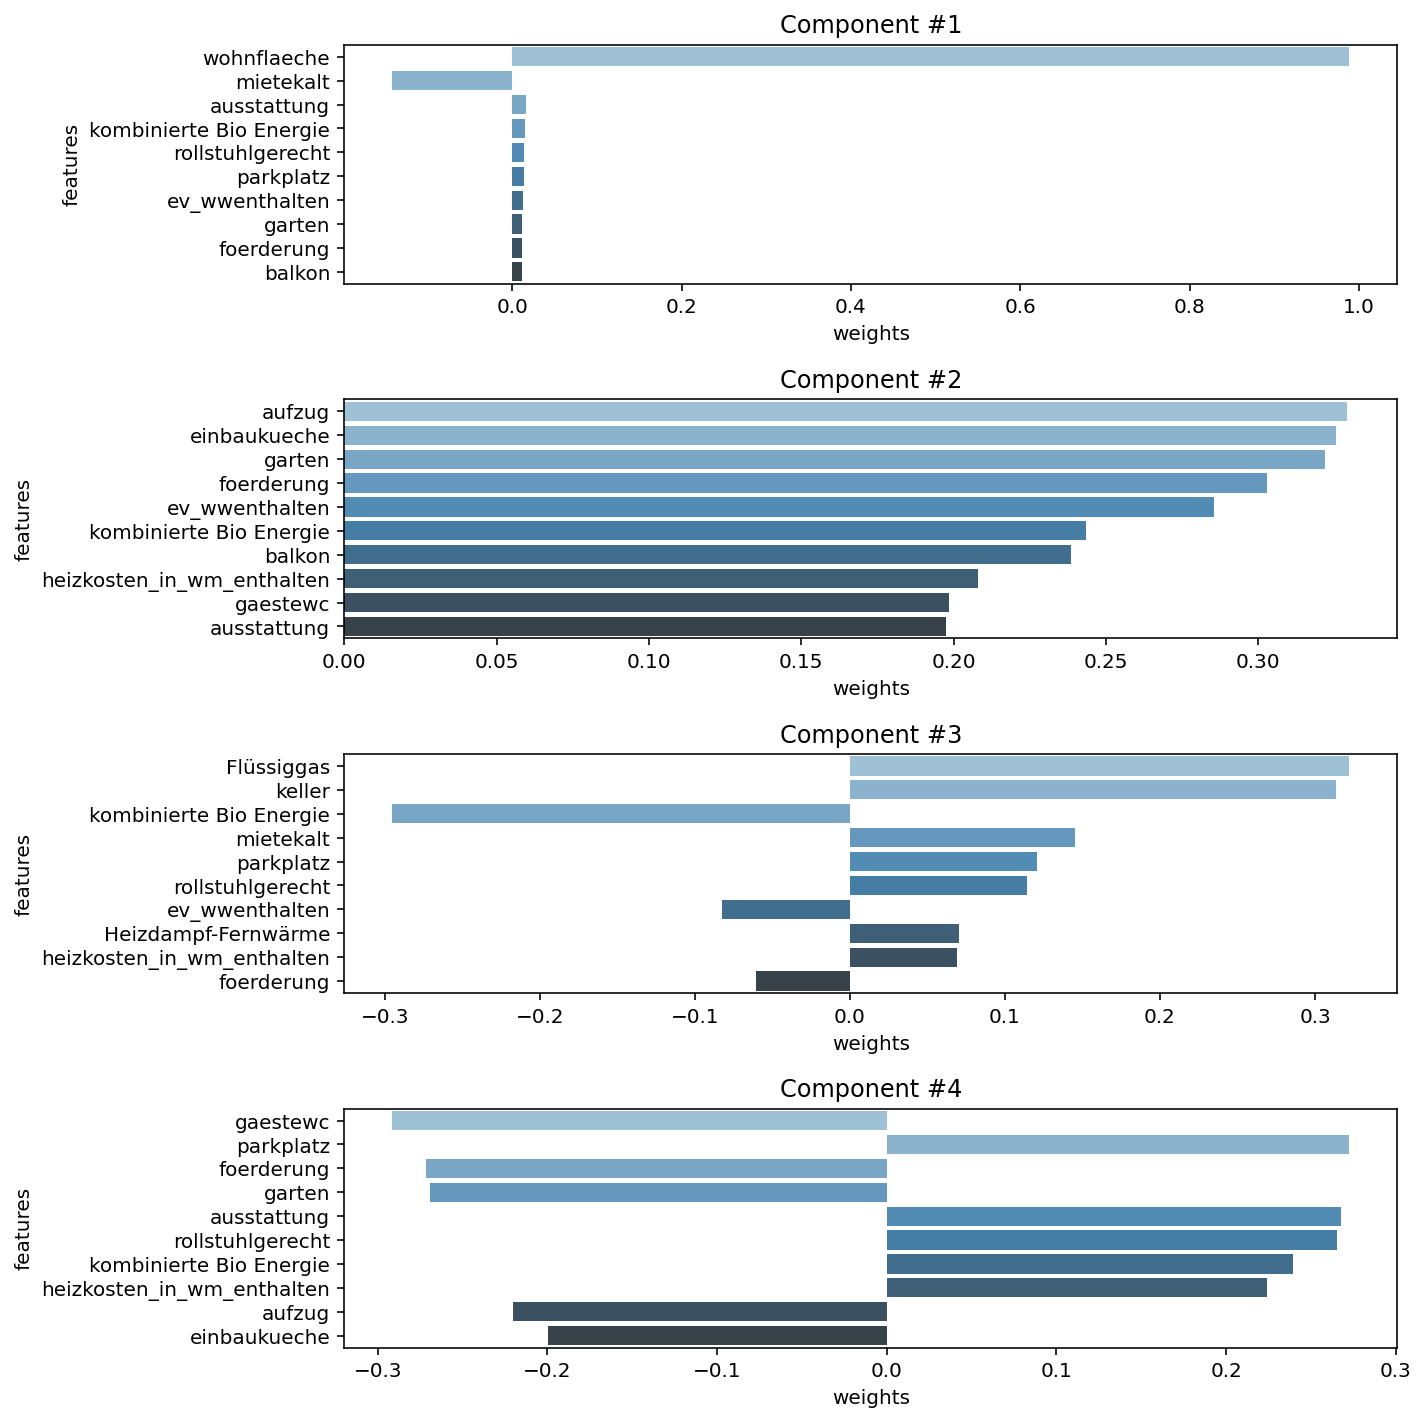

In [21]:
figure = plt.figure(figsize=(10,10))

for i in range(4):
    plt.subplot(4,1,i+1)
    f.display_components(v, clustering_df.columns, i, n_weights=10)
    plt.title('Component #{}'.format(i+1))
figure.tight_layout()

    

## Setup K-Means
Create K-Means analysis to find groups in customers based only on customer features

### Create input data based on PCA analysis
Use the `pca.transform()` function to create input data for the K-Means analysis.

In [23]:
%%time
# Create input data from PCA Analysis
pca_transformed = pca.fit_transform(normalized_values)

pca_transformed = pd.DataFrame(pca_transformed)
pca_transformed = pca_transformed.iloc[:,:1]
PCA_list=['C_1']
pca_transformed.columns=PCA_list

pca_transformed.head()



CPU times: user 1min 28s, sys: 42.3 s, total: 2min 10s
Wall time: 42 s


C_1
0  0.031863
1  0.024587
2  0.009918
3  0.009918
4  0.041820

In [24]:
%%time
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist


# Do a loop over different k's to find the optimum
inertias = []
distortions = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i).fit(pca_transformed)
    cluster_centers = kmeans.cluster_centers_
    inertias.append(kmeans.inertia_)
    
    distortions.append(sum(np.min(cdist(pca_transformed, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / pca_transformed.shape[0])
                                        
    inertias.append(kmeans.inertia_)
    

CPU times: user 5min 50s, sys: 1min 11s, total: 7min 2s
Wall time: 1min 5s


In [25]:
distortions

[0.03841897094503507,
 0.02097045556170345,
 0.014845106140470623,
 0.011635849401956383,
 0.009609495101428257,
 0.008027771344666408,
 0.006932884120512401]

<AxesSubplot:>

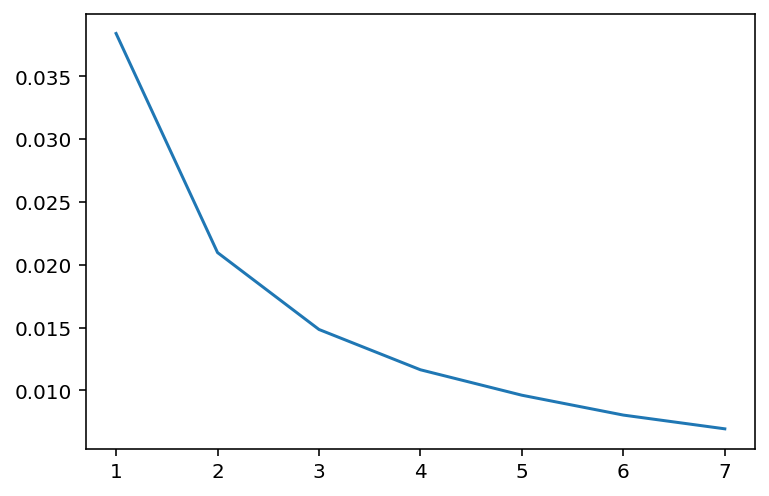

In [27]:
sns.lineplot(x=range(1,8), y=distortions)

In [28]:
%%time
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(pca_transformed)
labels = kmeans.labels_

CPU times: user 40.8 s, sys: 9 s, total: 49.8 s
Wall time: 6.97 s


In [29]:
cluster_df = pd.DataFrame(kmeans.cluster_centers_, columns=pca_transformed.columns)


Text(0.5, 1.0, 'Attribute Value by Centroid')

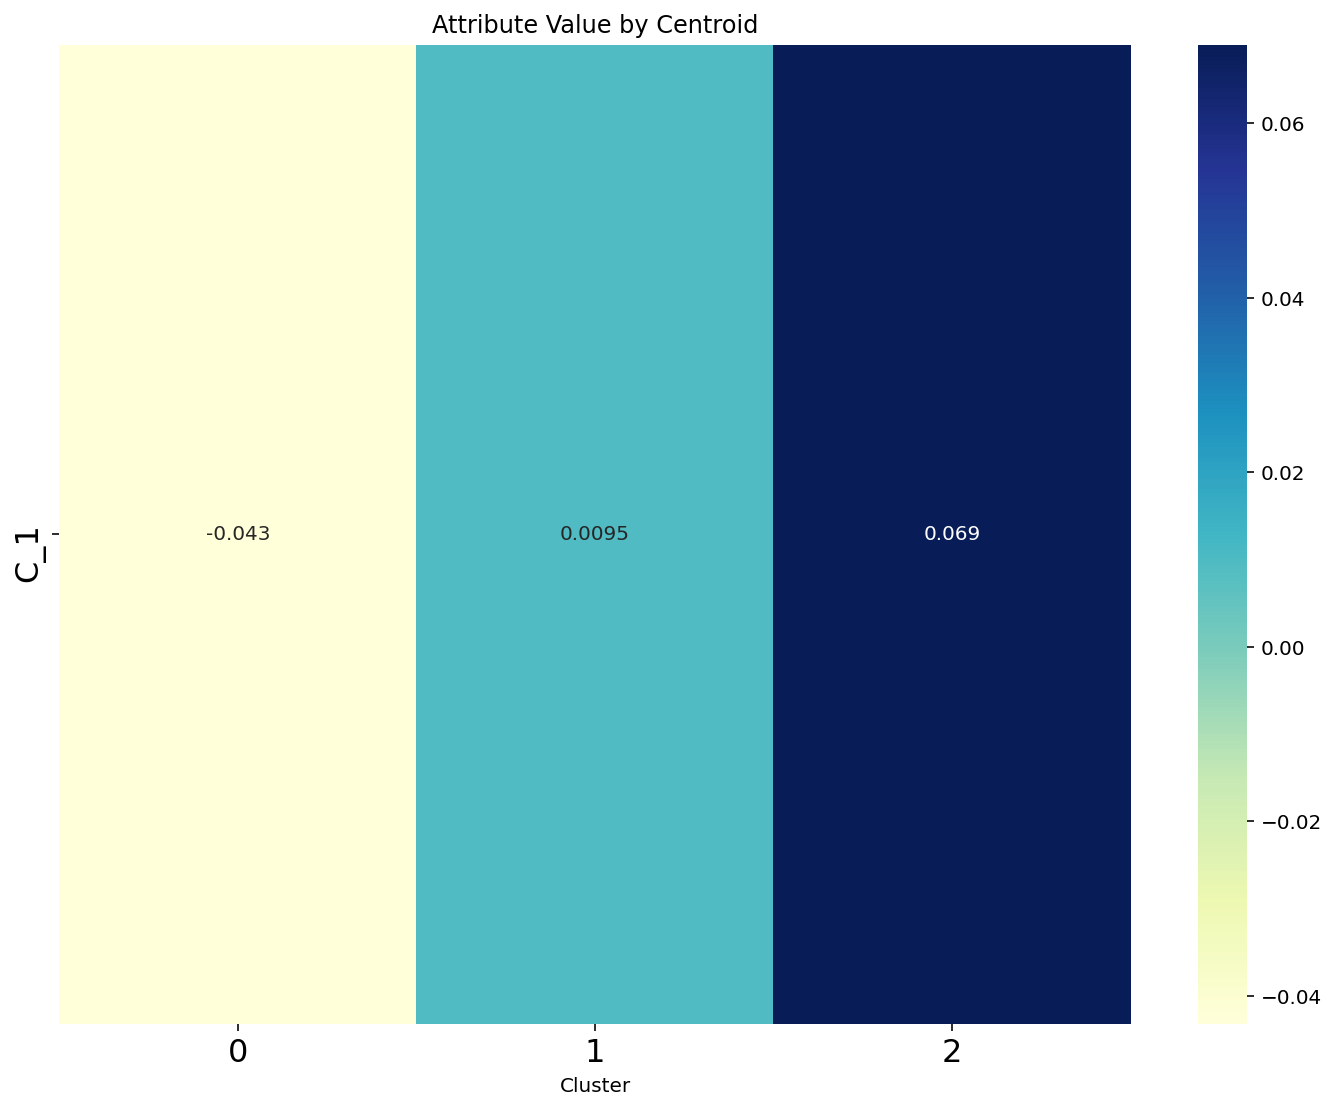

In [30]:
plt.figure(figsize = (12,9))
ax = sns.heatmap(cluster_df.T, cmap = 'YlGnBu', annot=True)
ax.set_xlabel("Cluster")
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
ax.set_title("Attribute Value by Centroid")



In [31]:
df.loc[:, 'label'] = labels

In [32]:
df['Gas'].value_counts()

0    2597913
1      53972
Name: Gas, dtype: int64

In [43]:
ticks = [0, 3, 4, 1, 2]
#label_mapping = {4:'very high priced', 1:'high priced', 3:'normal priced', 0:'low priced', 2:'very low priced'}
label_mapping = {0:'high priced', 1:'medium priced', 2:'low priced'}


df.label = df.label.map(label_mapping)



In [44]:
df.ausstattung.fillna('Unbekannt', inplace=True)

In [45]:
city_count = df.groupby(['City', 'year']).label.value_counts(normalize=True).reset_index(name='label_ratio')
wohnflaeche = df.groupby(['City', 'year', 'label']).wohnflaeche.mean().reset_index(name='wohnflaeche_mean')
baujahr = df.groupby(['City', 'year', 'label']).baujahr.mean().reset_index(name='baujahr_mean')
rent_sqm = df.groupby(['City', 'year', 'label']).rent_sqm.mean().reset_index(name='rent_sqm_mean')
miete_mean = df.groupby(['City', 'year', 'label']).mietekalt.mean().reset_index(name='mietekalt_mean')
laufzeittage = df.groupby(['City', 'year', 'label']).laufzeittage.mean().reset_index(name='laufzeittage_mean')
anzahletagen = df.groupby(['City', 'year', 'label']).anzahletagen.mean().reset_index(name='anzahletagen_mean')
zimmeranzahl = df.groupby(['City', 'year', 'label']).zimmeranzahl.mean().reset_index(name='zimmeranzahl_mean')
schlafzimmer = df.groupby(['City', 'year', 'label']).schlafzimmer.mean().reset_index(name='schlafzimmer_mean')


summary =miete_mean.merge(wohnflaeche, left_on=['City', 'year', 'label'], right_on=['City', 'year', 'label']) \
.merge(baujahr, left_on=['City', 'year', 'label'], right_on=['City', 'year', 'label']) \
.merge(rent_sqm, left_on=['City', 'year', 'label'], right_on=['City', 'year', 'label']) \
.merge(laufzeittage, left_on=['City', 'year', 'label'], right_on=['City', 'year', 'label']) \
.merge(anzahletagen, left_on=['City', 'year', 'label'], right_on=['City', 'year', 'label']) \
.merge(zimmeranzahl, left_on=['City', 'year', 'label'], right_on=['City', 'year', 'label']) \
.merge(schlafzimmer, left_on=['City', 'year', 'label'], right_on=['City', 'year', 'label']) \
.merge(city_count, left_on=['City', 'year', 'label'], right_on=['City', 'year', 'label'])







In [46]:
city_count = df.groupby(['City', 'year', 'ausstattung']).label.value_counts(normalize=True).reset_index(name='label_ratio')
wohnflaeche = df.groupby(['City', 'year', 'label', 'ausstattung']).wohnflaeche.mean().reset_index(name='wohnflaeche_mean')
baujahr = df.groupby(['City', 'year', 'label', 'ausstattung']).baujahr.mean().reset_index(name='baujahr_mean')
rent_sqm = df.groupby(['City', 'year', 'label', 'ausstattung']).rent_sqm.mean().reset_index(name='rent_sqm_mean')
miete_mean = df.groupby(['City', 'year', 'label', 'ausstattung']).mietekalt.mean().reset_index(name='mietekalt_mean')
laufzeittage = df.groupby(['City', 'year', 'label', 'ausstattung']).laufzeittage.mean().reset_index(name='laufzeittage_mean')
anzahletagen = df.groupby(['City', 'year', 'label', 'ausstattung']).anzahletagen.mean().reset_index(name='anzahletagen_mean')
zimmeranzahl = df.groupby(['City', 'year', 'label', 'ausstattung']).zimmeranzahl.mean().reset_index(name='zimmeranzahl_mean')
schlafzimmer = df.groupby(['City', 'year', 'label', 'ausstattung']).schlafzimmer.mean().reset_index(name='schlafzimmer_mean')


summary_ausstatung =miete_mean.merge(wohnflaeche, left_on=['City', 'year', 'label', 'ausstattung'], right_on=['City', 'year', 'label', 'ausstattung']) \
.merge(baujahr, left_on=['City', 'year', 'label', 'ausstattung'], right_on=['City', 'year', 'label', 'ausstattung']) \
.merge(rent_sqm, left_on=['City', 'year', 'label', 'ausstattung'], right_on=['City', 'year', 'label', 'ausstattung']) \
.merge(laufzeittage, left_on=['City', 'year', 'label', 'ausstattung'], right_on=['City', 'year', 'label', 'ausstattung']) \
.merge(anzahletagen, left_on=['City', 'year', 'label', 'ausstattung'], right_on=['City', 'year', 'label', 'ausstattung']) \
.merge(zimmeranzahl, left_on=['City', 'year', 'label', 'ausstattung'], right_on=['City', 'year', 'label', 'ausstattung']) \
.merge(schlafzimmer, left_on=['City', 'year', 'label', 'ausstattung'], right_on=['City', 'year', 'label', 'ausstattung']) \
.merge(city_count, left_on=['City', 'year', 'label', 'ausstattung'], right_on=['City', 'year', 'label', 'ausstattung'])







In [49]:
label_order = ['low priced', 'medium priced', 'high priced']
ausstattung_order = ['Einfach', 'Normal', 'Gehoben', 'Luxus', 'Unbekannt']

 

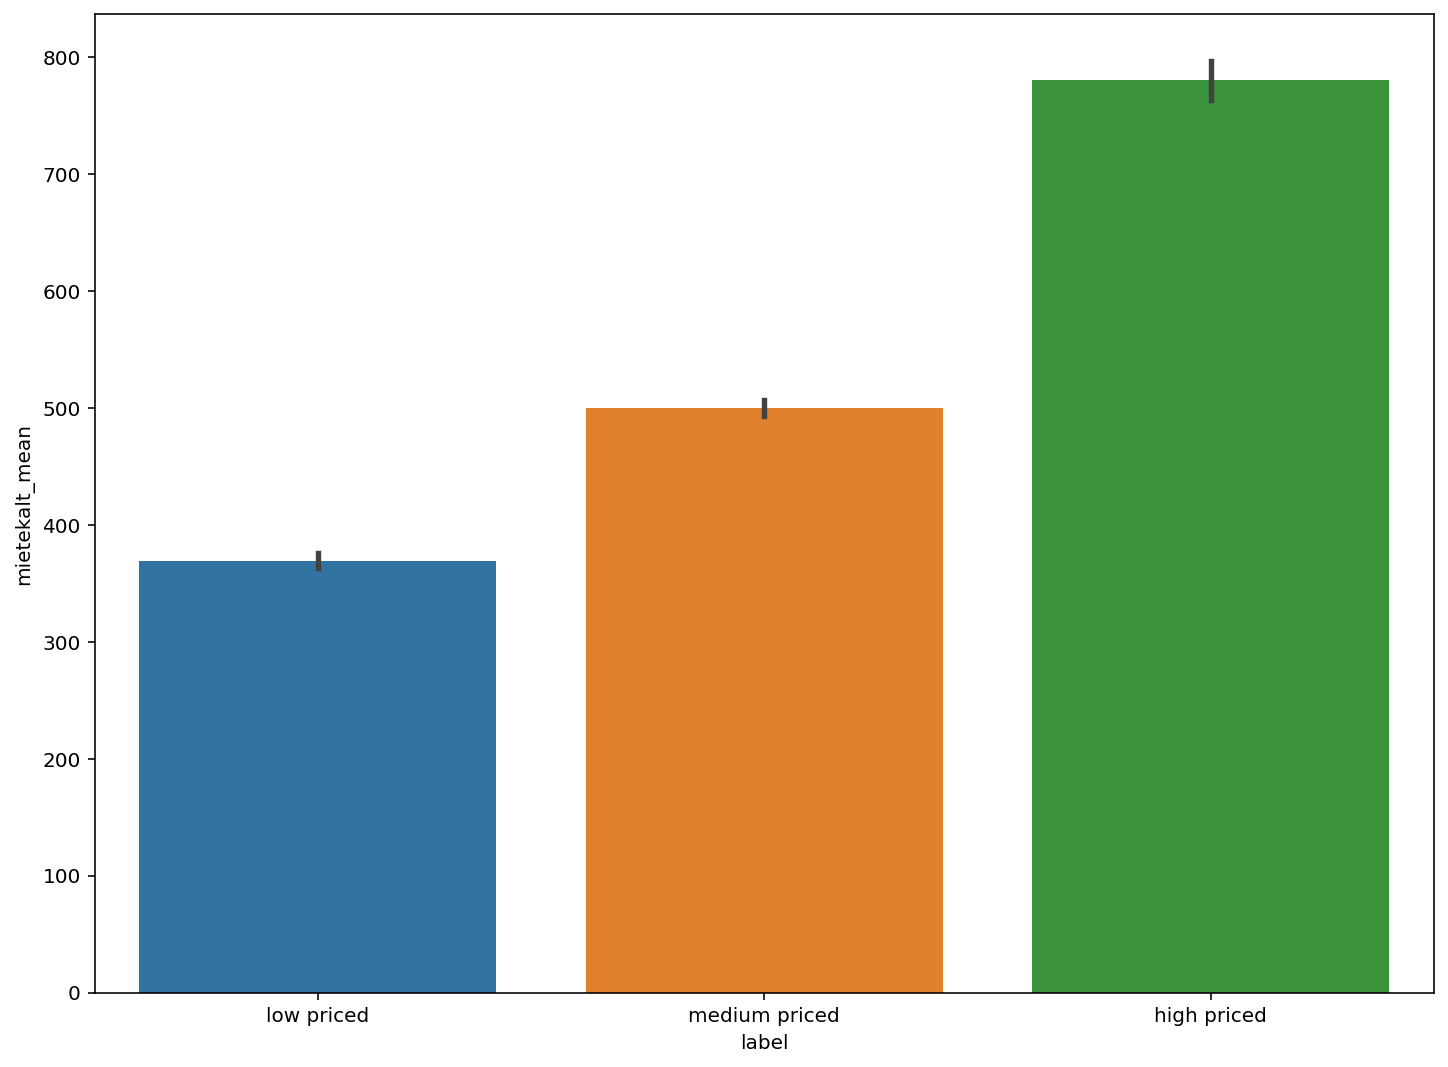

In [50]:
plt.figure(figsize=(12, 9))
sns.barplot(data=summary, x='label', y='mietekalt_mean', order=label_order);


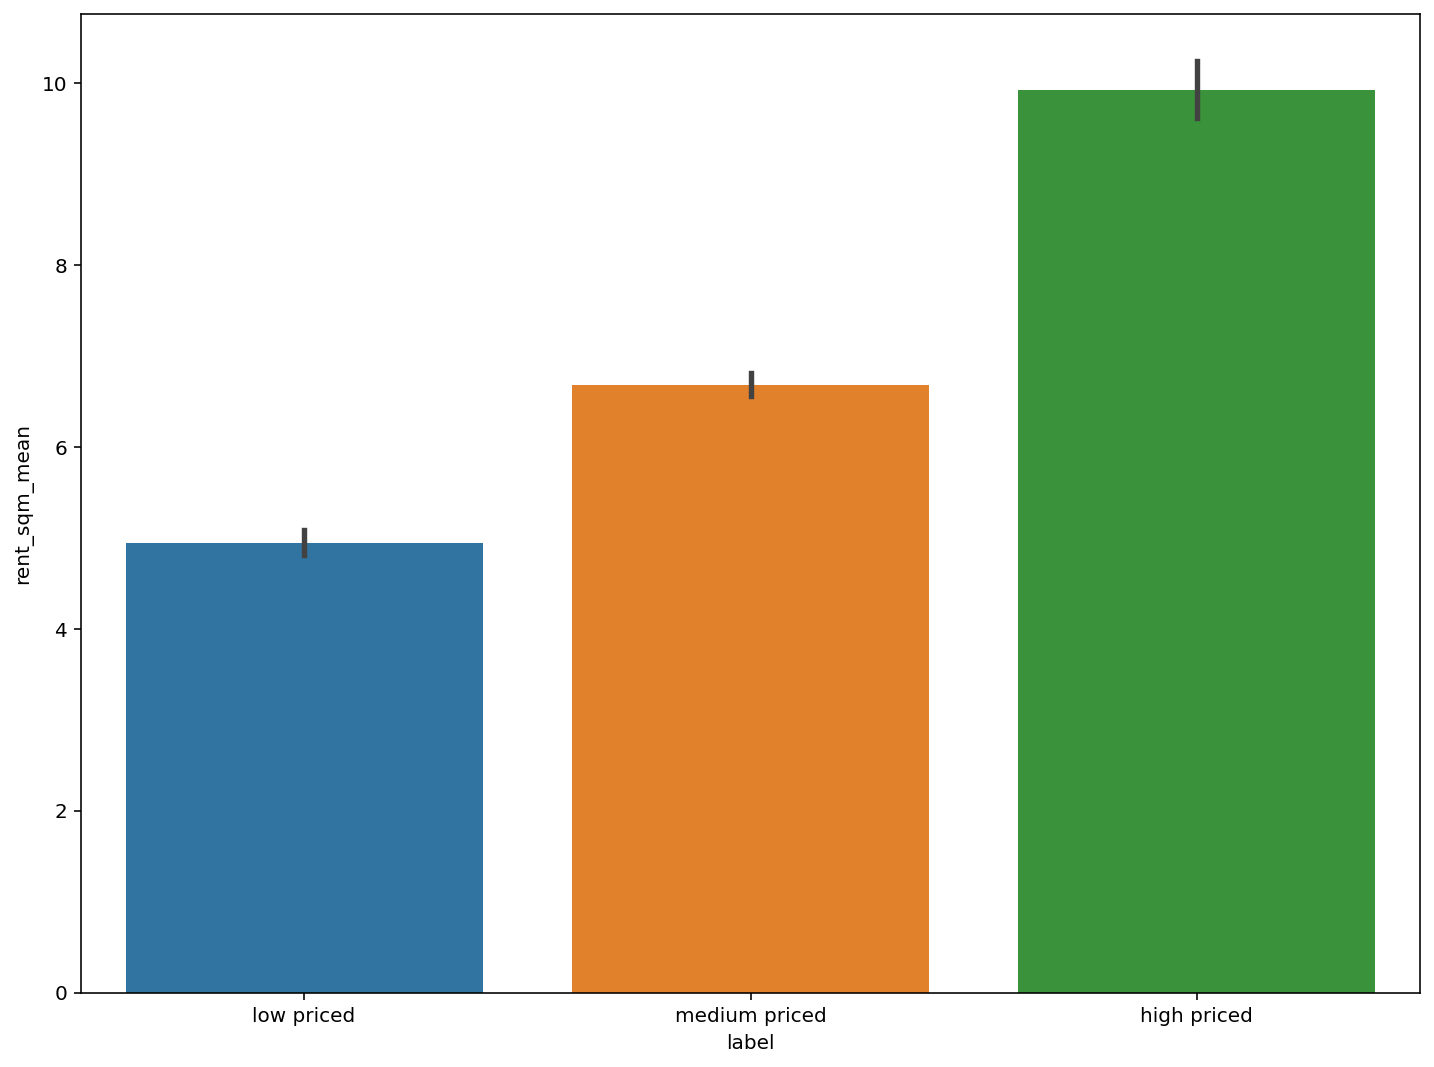

In [51]:
plt.figure(figsize=(12, 9))
sns.barplot(data=summary.query('City == "Leipzig"'), x='label', y='rent_sqm_mean', order=label_order);



<AxesSubplot:xlabel='wohnflaeche_mean', ylabel='rent_sqm_mean'>

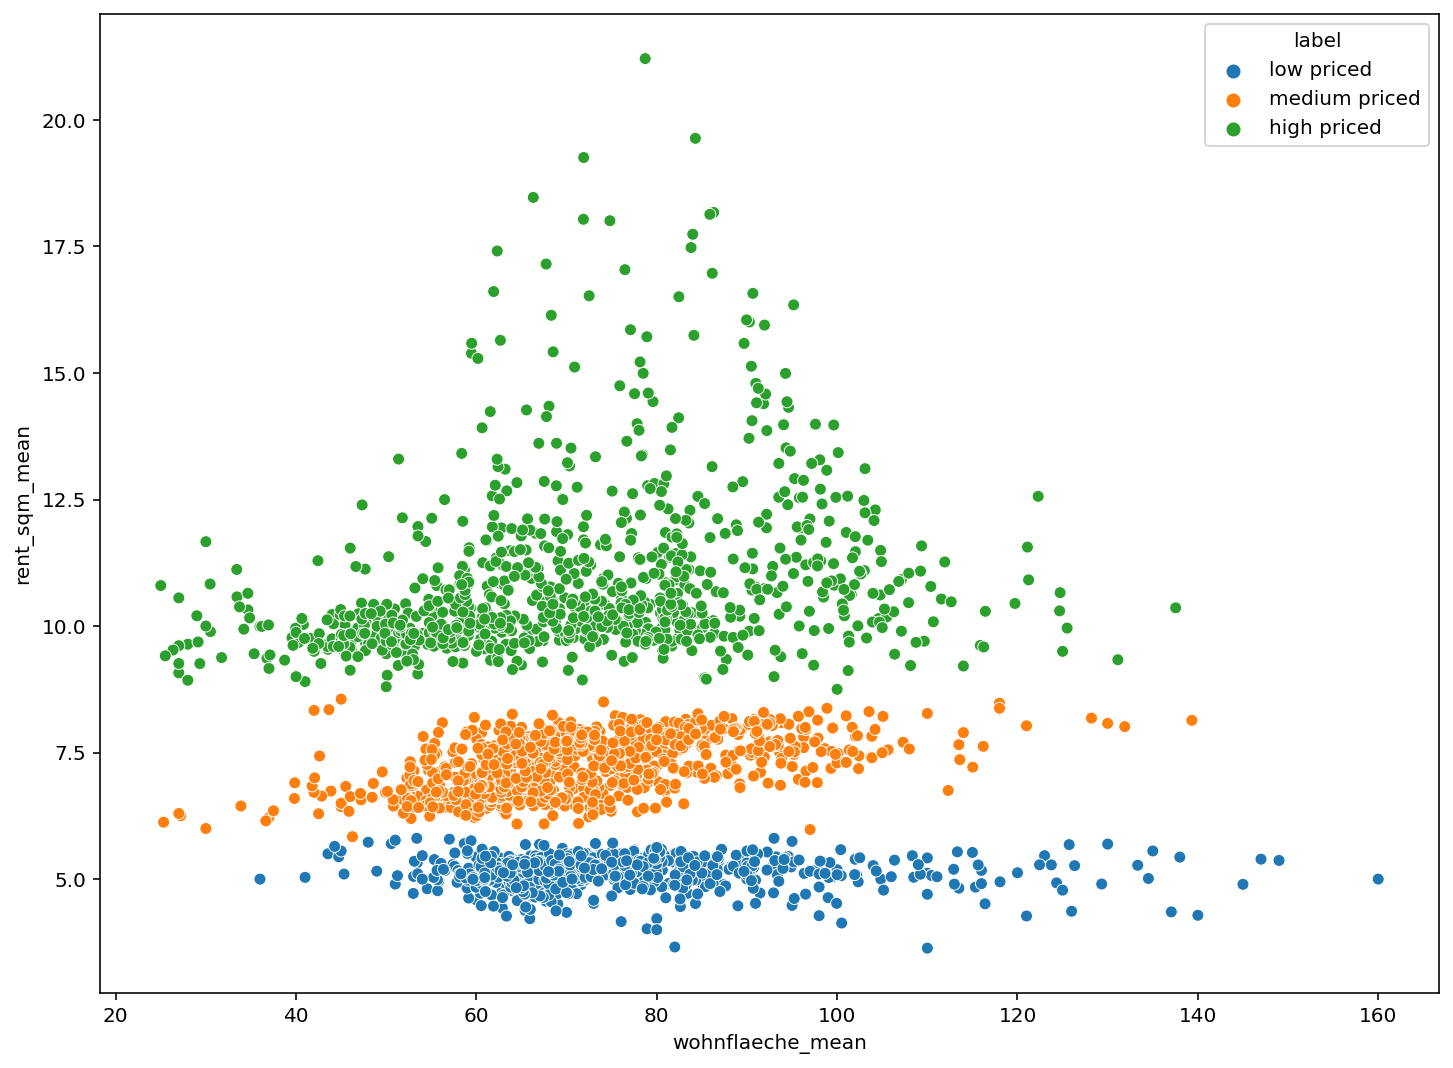

In [53]:
plt.figure(figsize=(12,9))

sns.scatterplot(data=summary_ausstatung, x='wohnflaeche_mean', y='rent_sqm_mean', hue='label', hue_order=label_order)

<AxesSubplot:xlabel='wohnflaeche_mean', ylabel='rent_sqm_mean'>

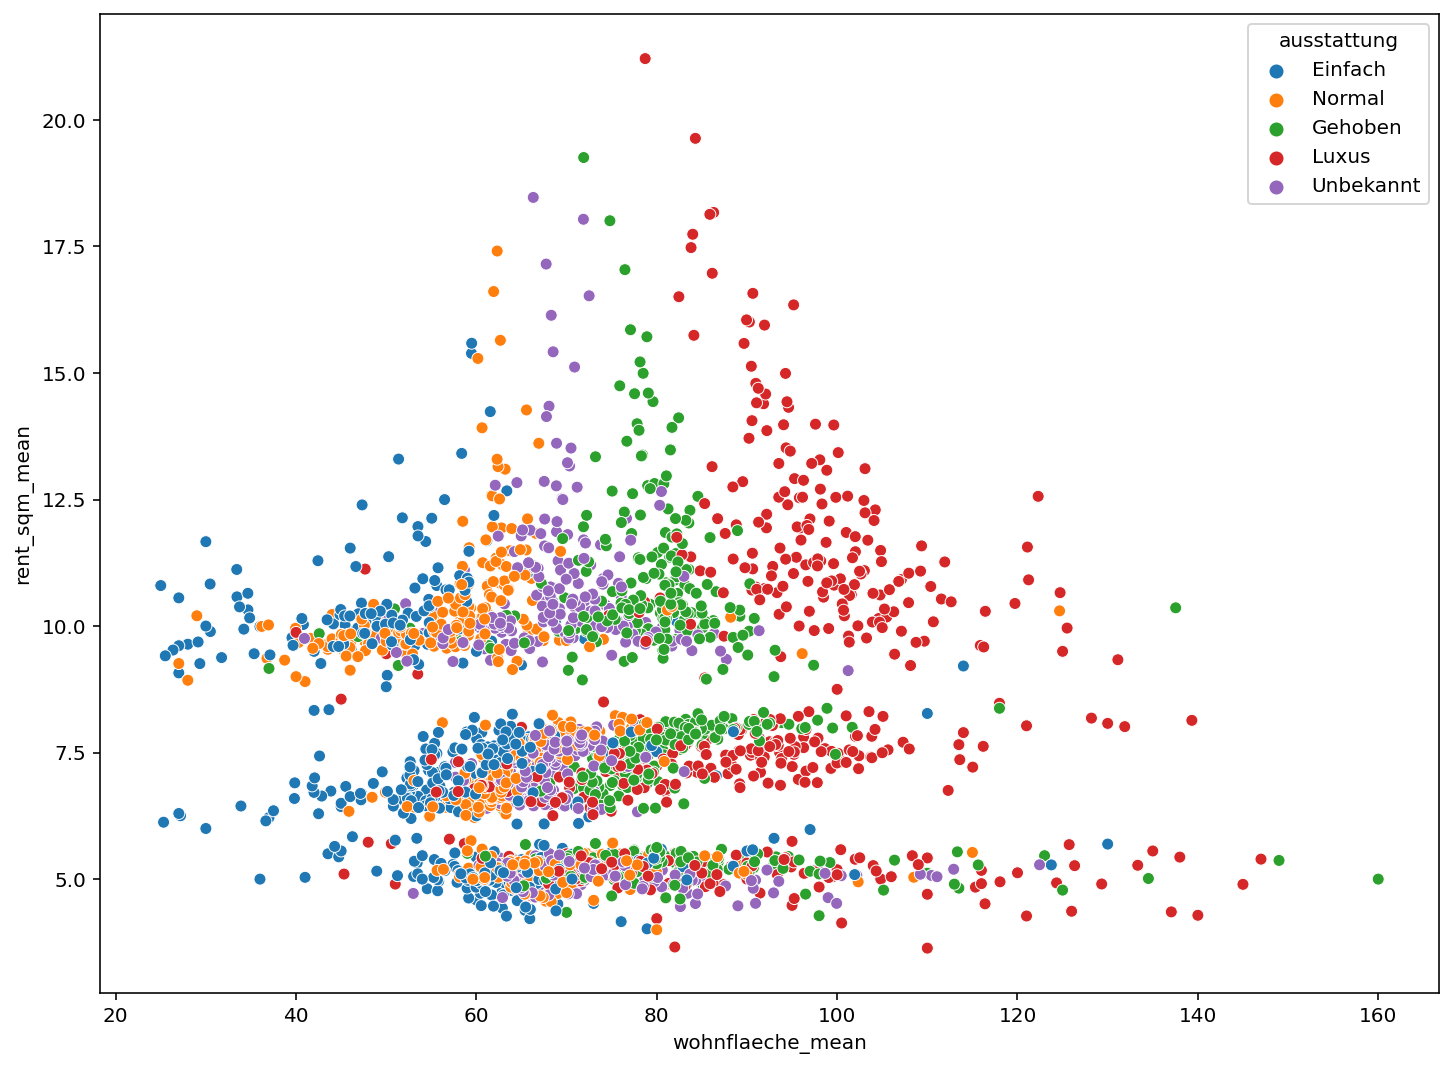

In [54]:
plt.figure(figsize=(12,9))

hue_order = ['Einfach', 'Normal', 'Gehoben', 'Luxus', 'Unbekannt']
sns.scatterplot(data=summary_ausstatung, x='wohnflaeche_mean', y='rent_sqm_mean', hue='ausstattung', hue_order=ausstattung_order)

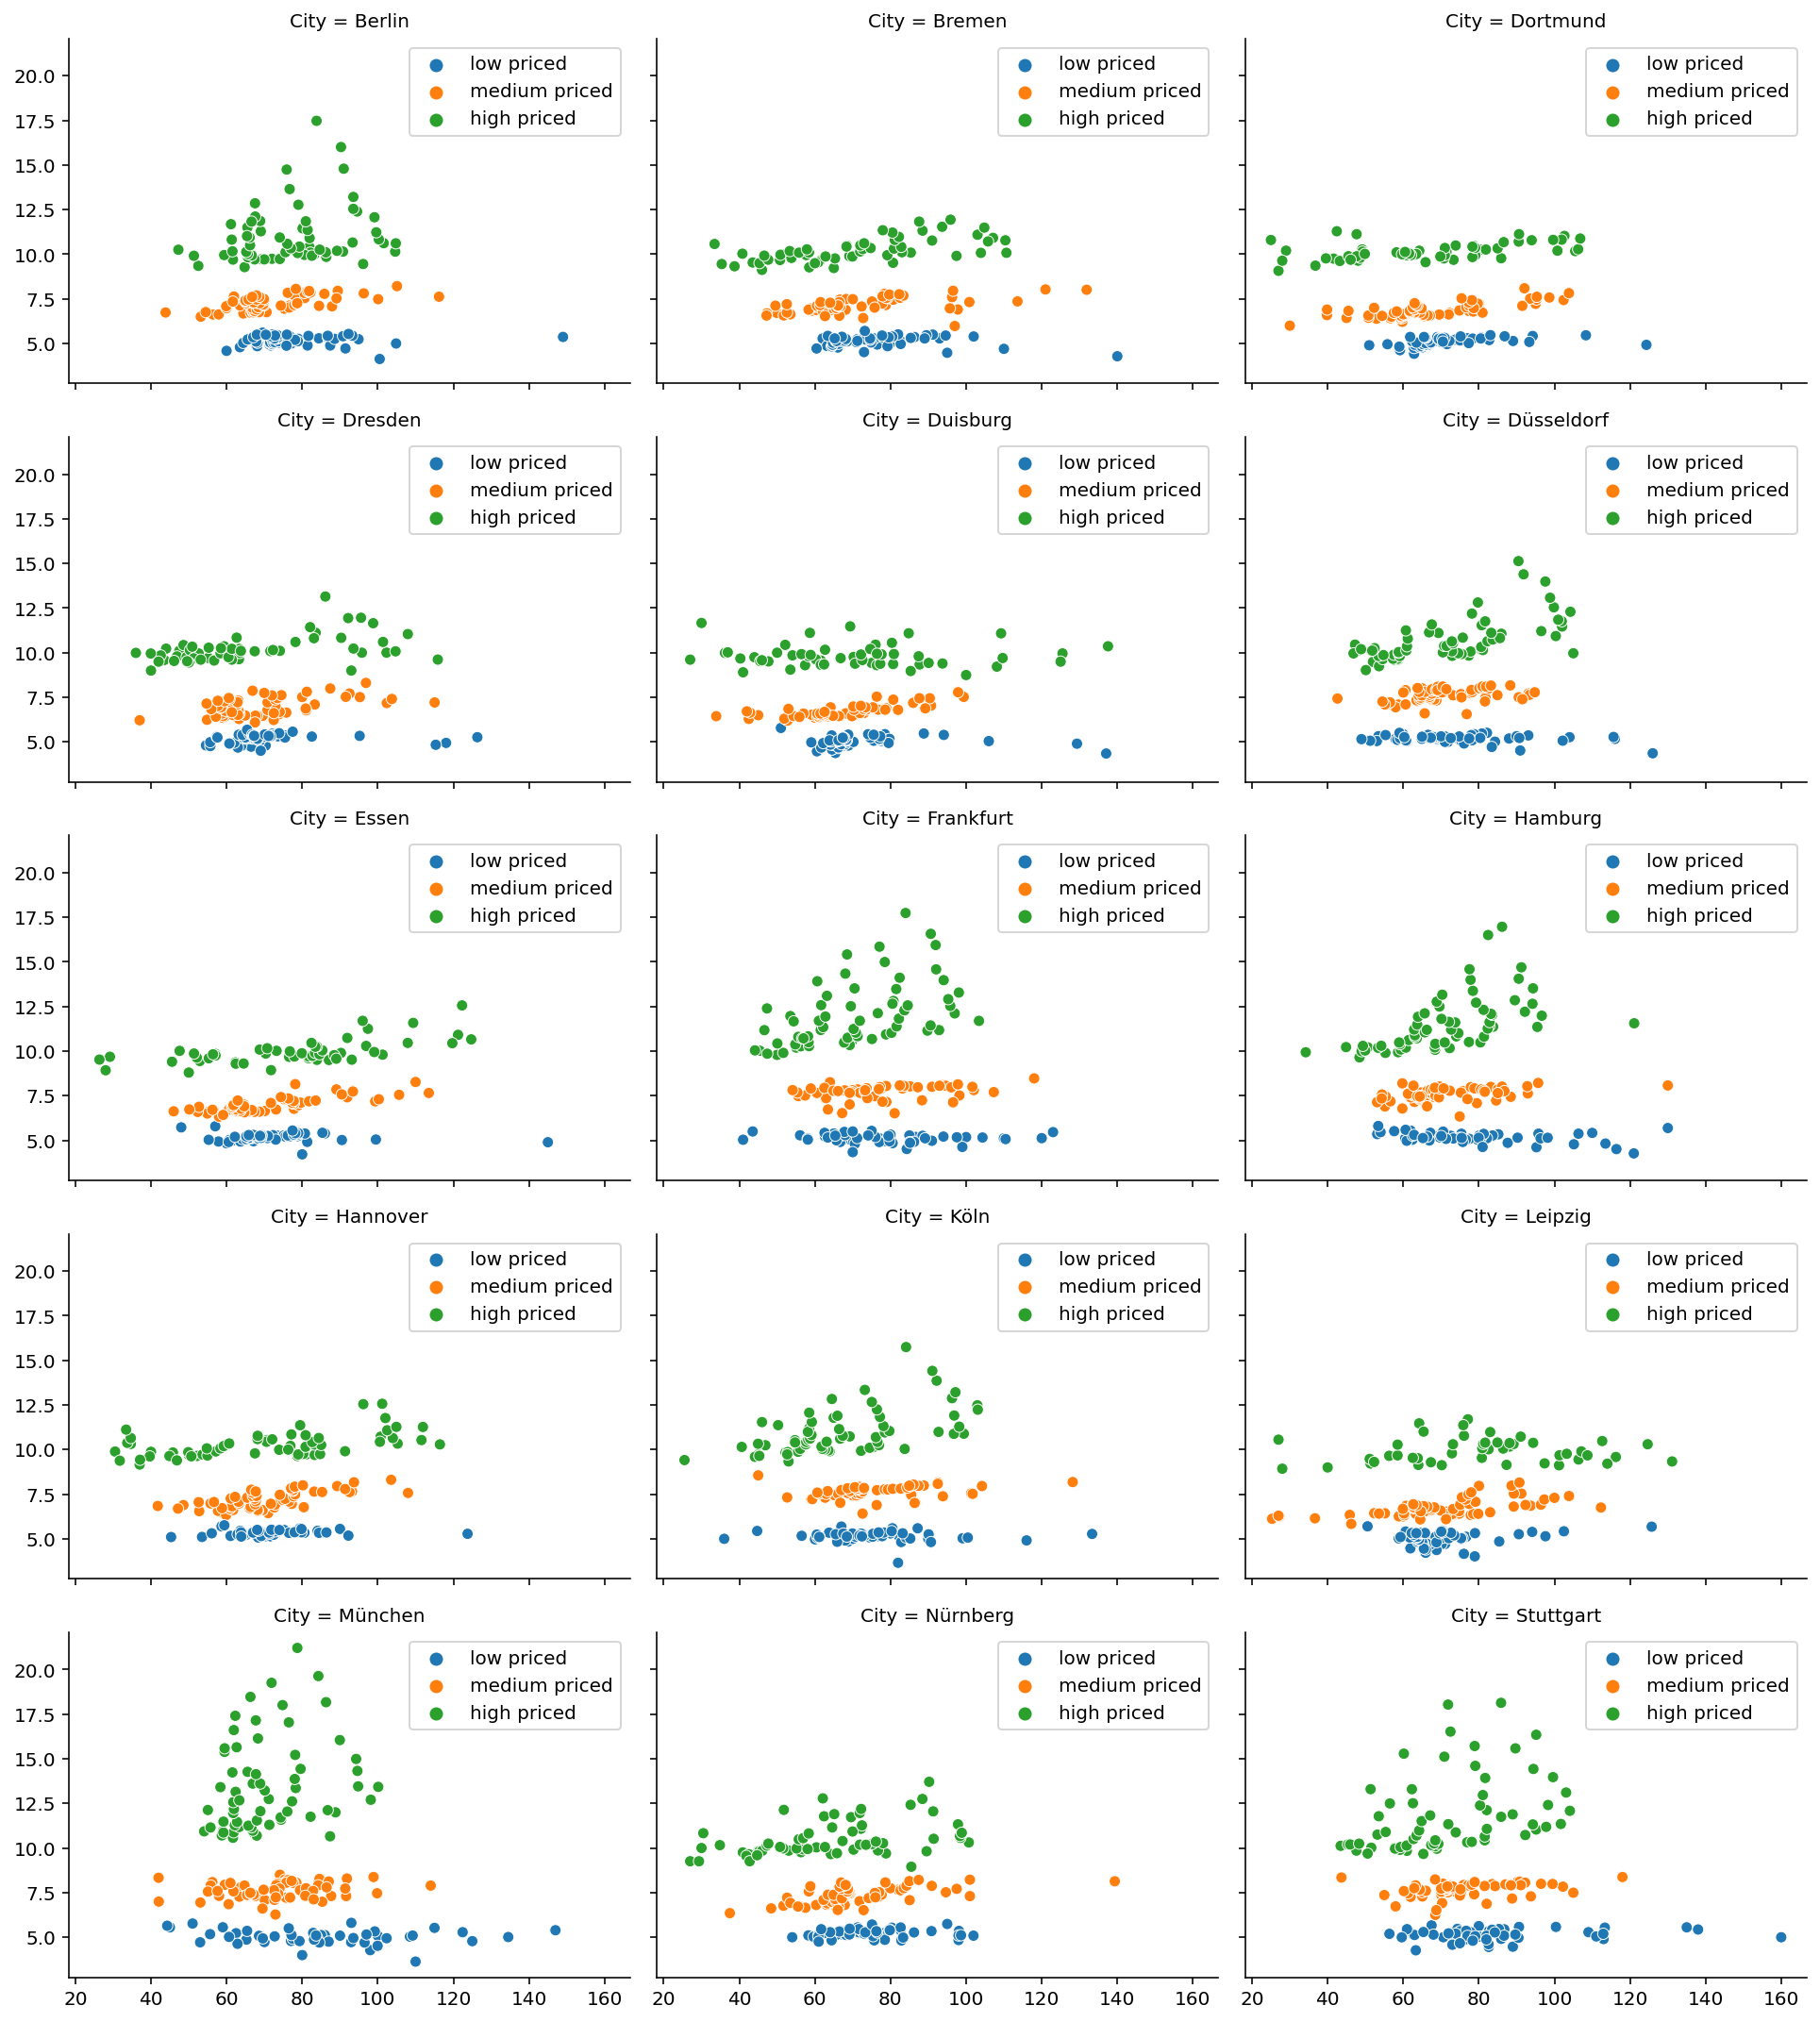

In [55]:


g = sns.FacetGrid(data=summary_ausstatung, col='City', col_wrap=3, height=3, aspect=1.5)
g.map_dataframe(sns.scatterplot, x='wohnflaeche_mean', y='rent_sqm_mean', hue='label', hue_order=label_order)

for ax in g.axes.ravel():
    ax.legend()

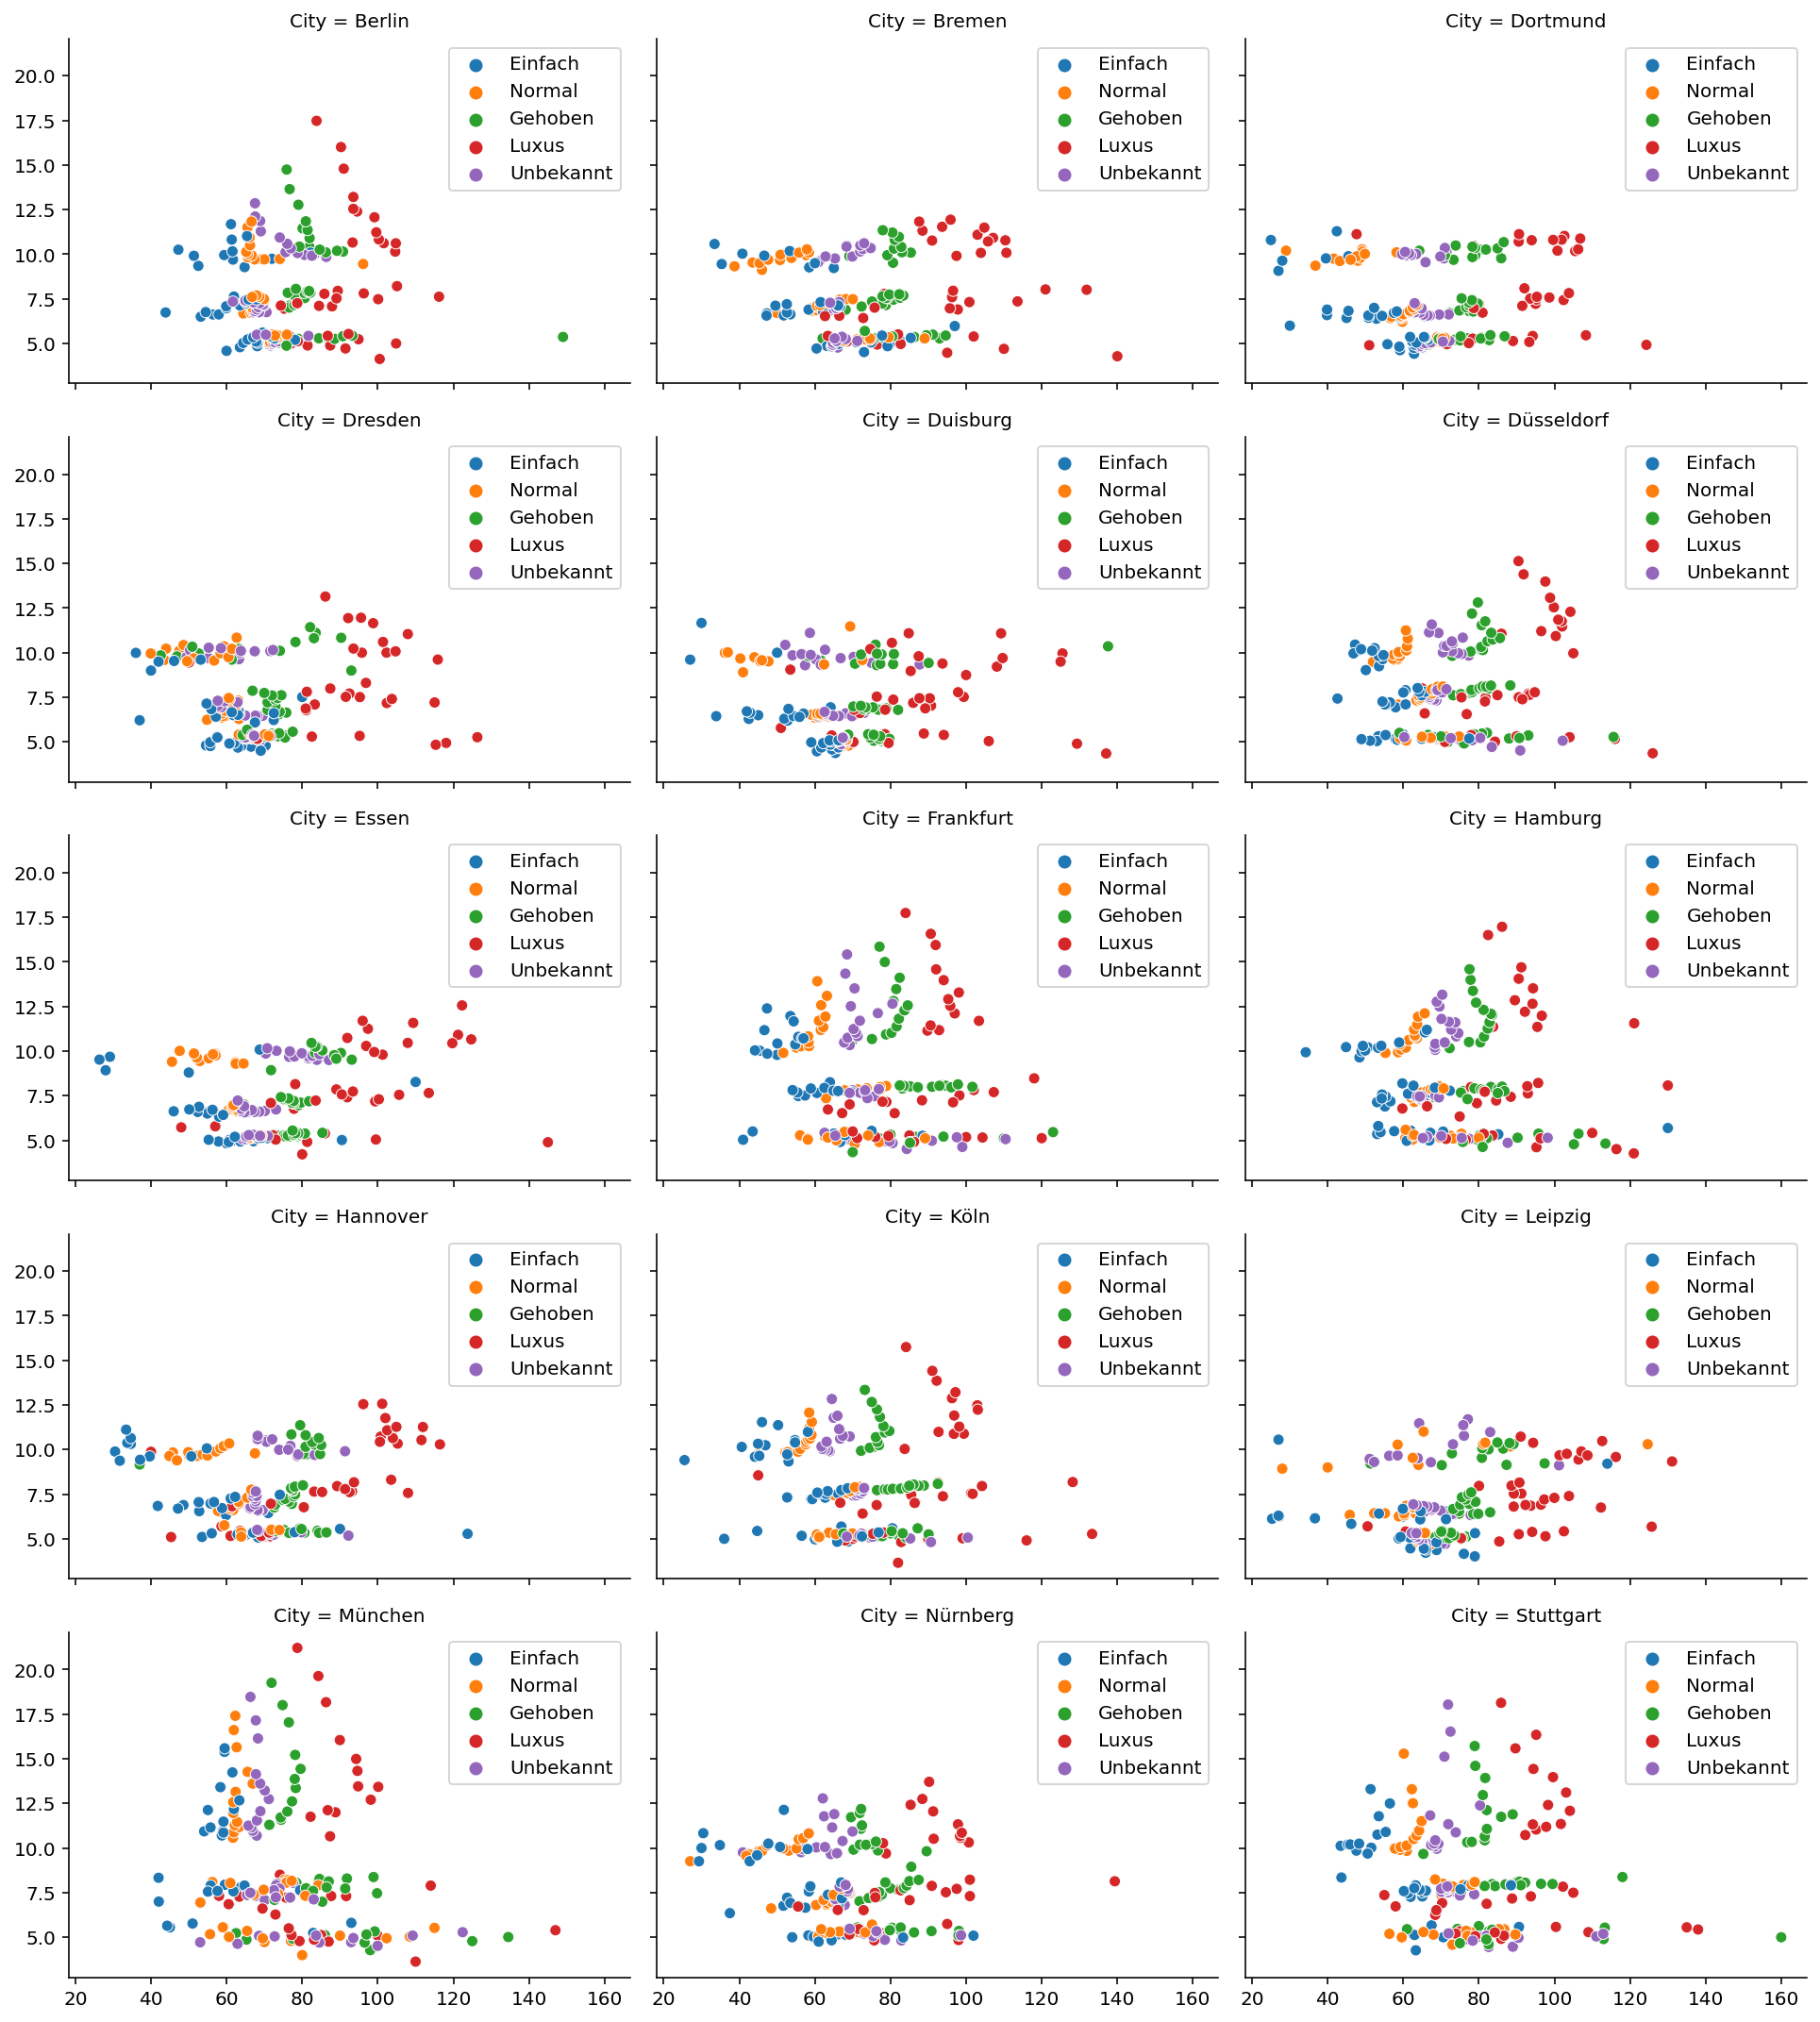

In [56]:
hue_order = ['Einfach', 'Normal', 'Gehoben', 'Luxus', 'Unbekannt']
g = sns.FacetGrid(data=summary_ausstatung, col='City', col_wrap=3, height=3, aspect=1.5)
g.map_dataframe(sns.scatterplot, x='wohnflaeche_mean', y='rent_sqm_mean', hue='ausstattung', hue_order=ausstattung_order)

for ax in g.axes.ravel():
    ax.legend()

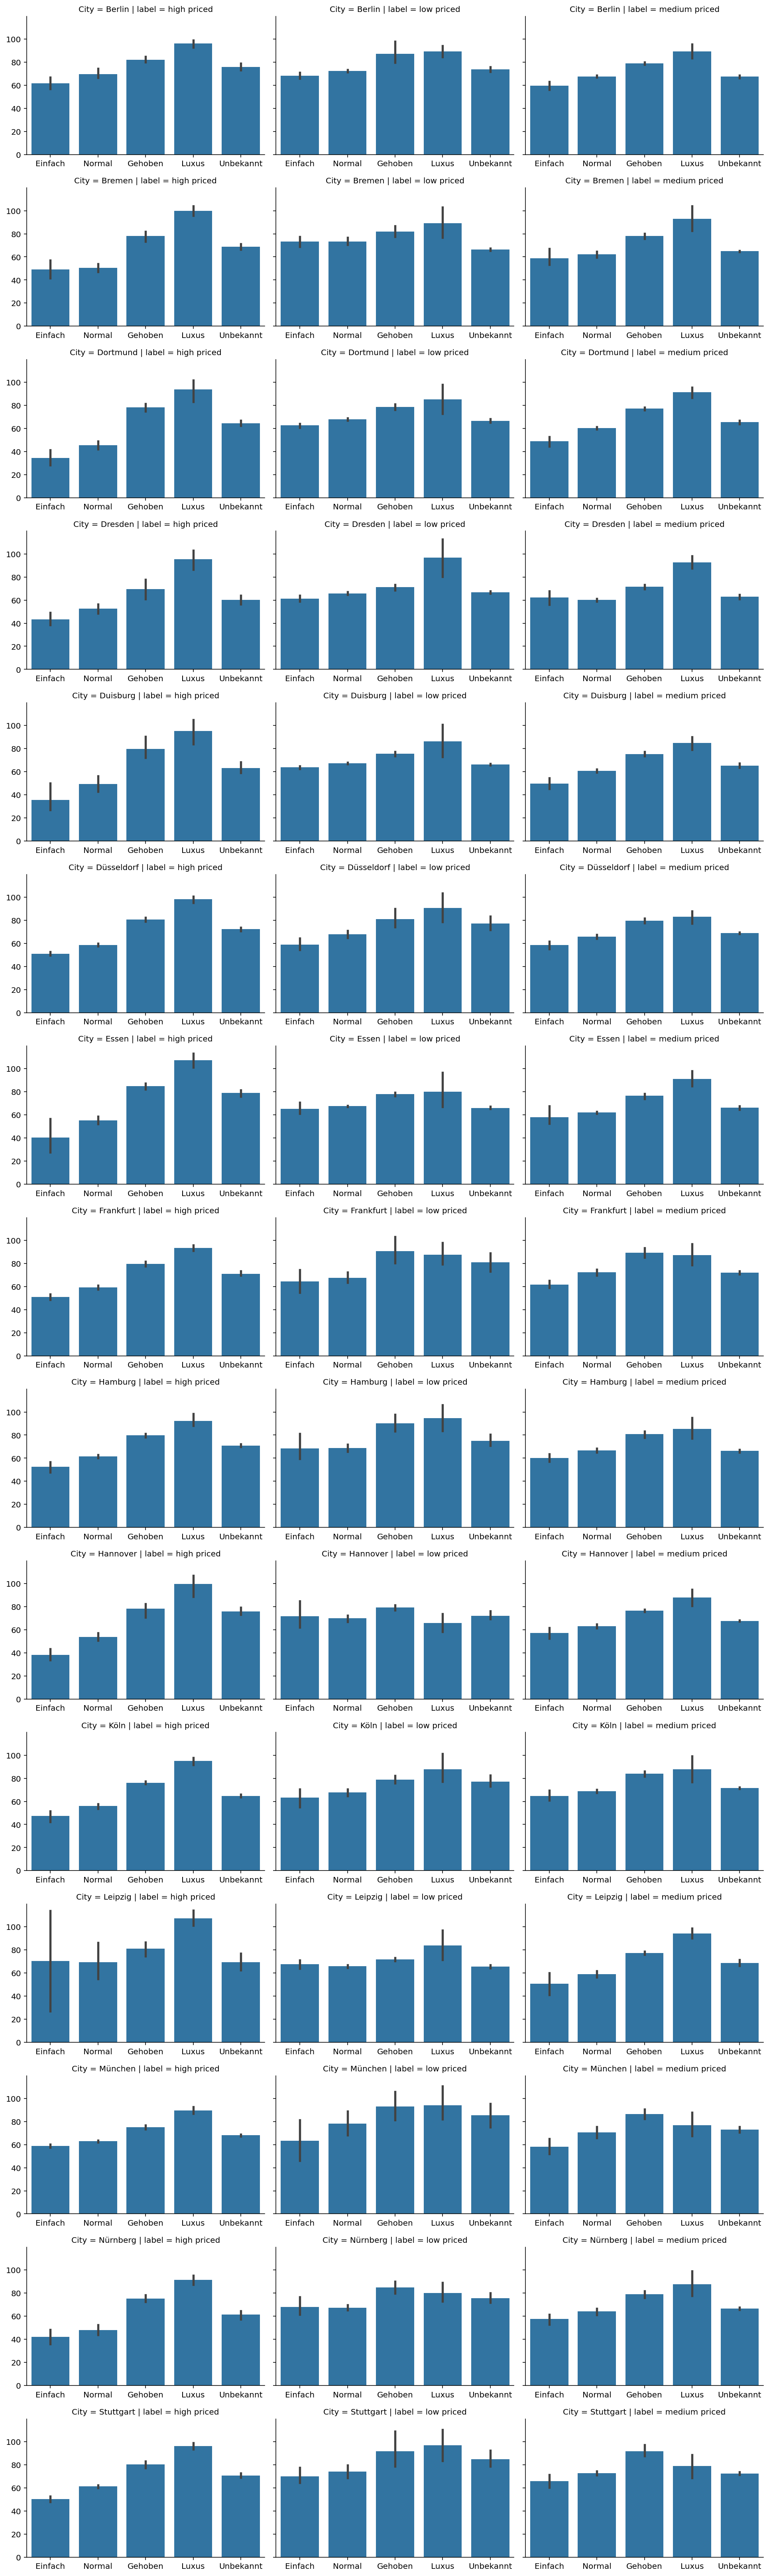

In [57]:
g = sns.FacetGrid(data=summary_ausstatung, col='label', row='City', height=3, aspect=1.5, sharex=False)
g.map_dataframe(sns.barplot, x='ausstattung', y='wohnflaeche_mean', order=ausstattung_order)


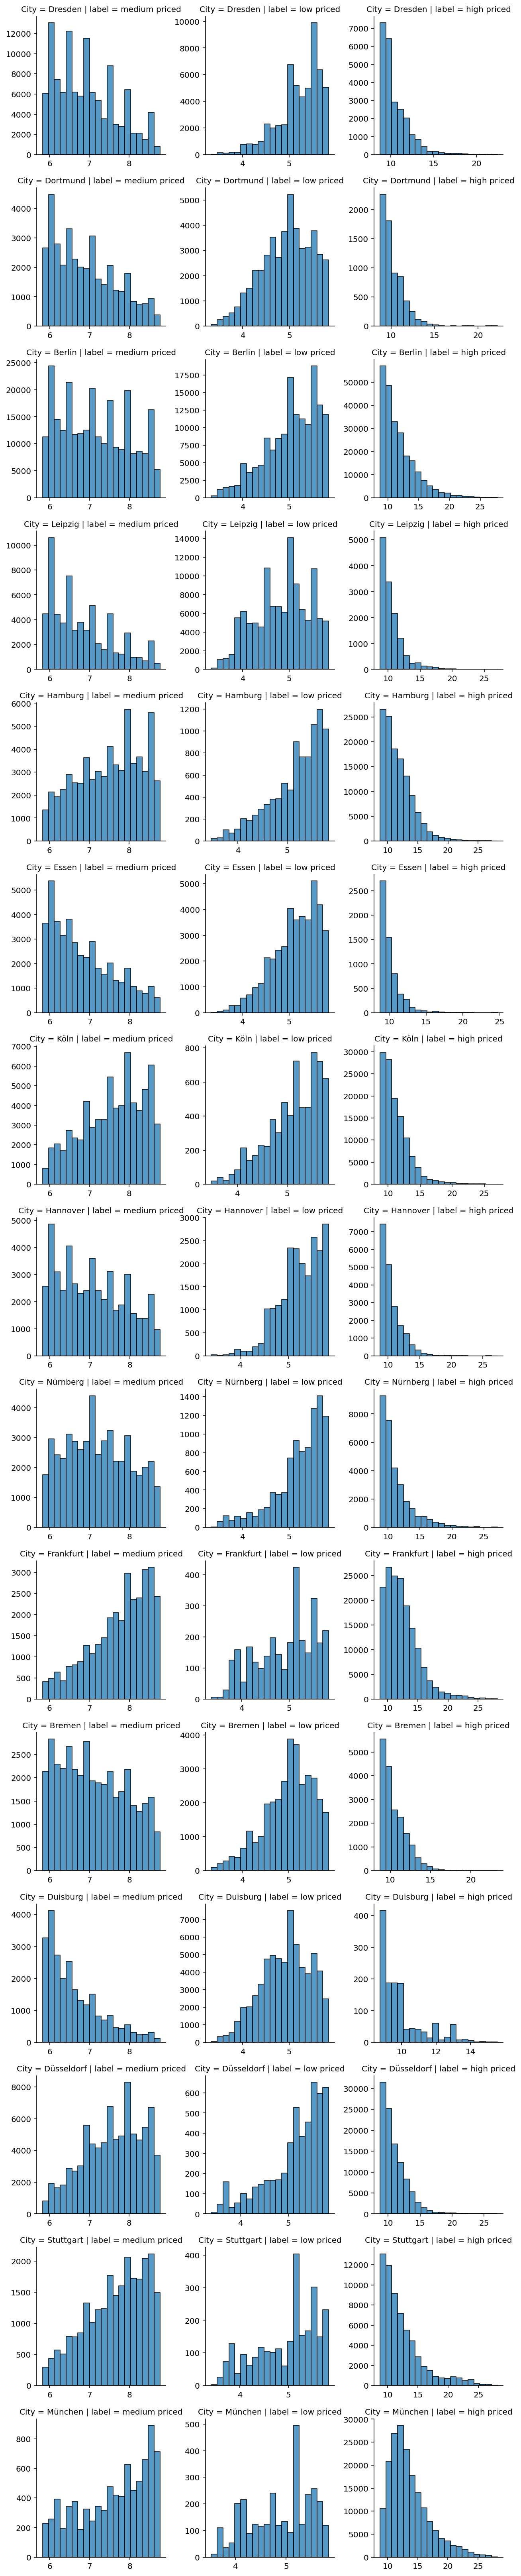

In [61]:
g = sns.FacetGrid(data=df, col='label', row='City', sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x='rent_sqm', bins=20)



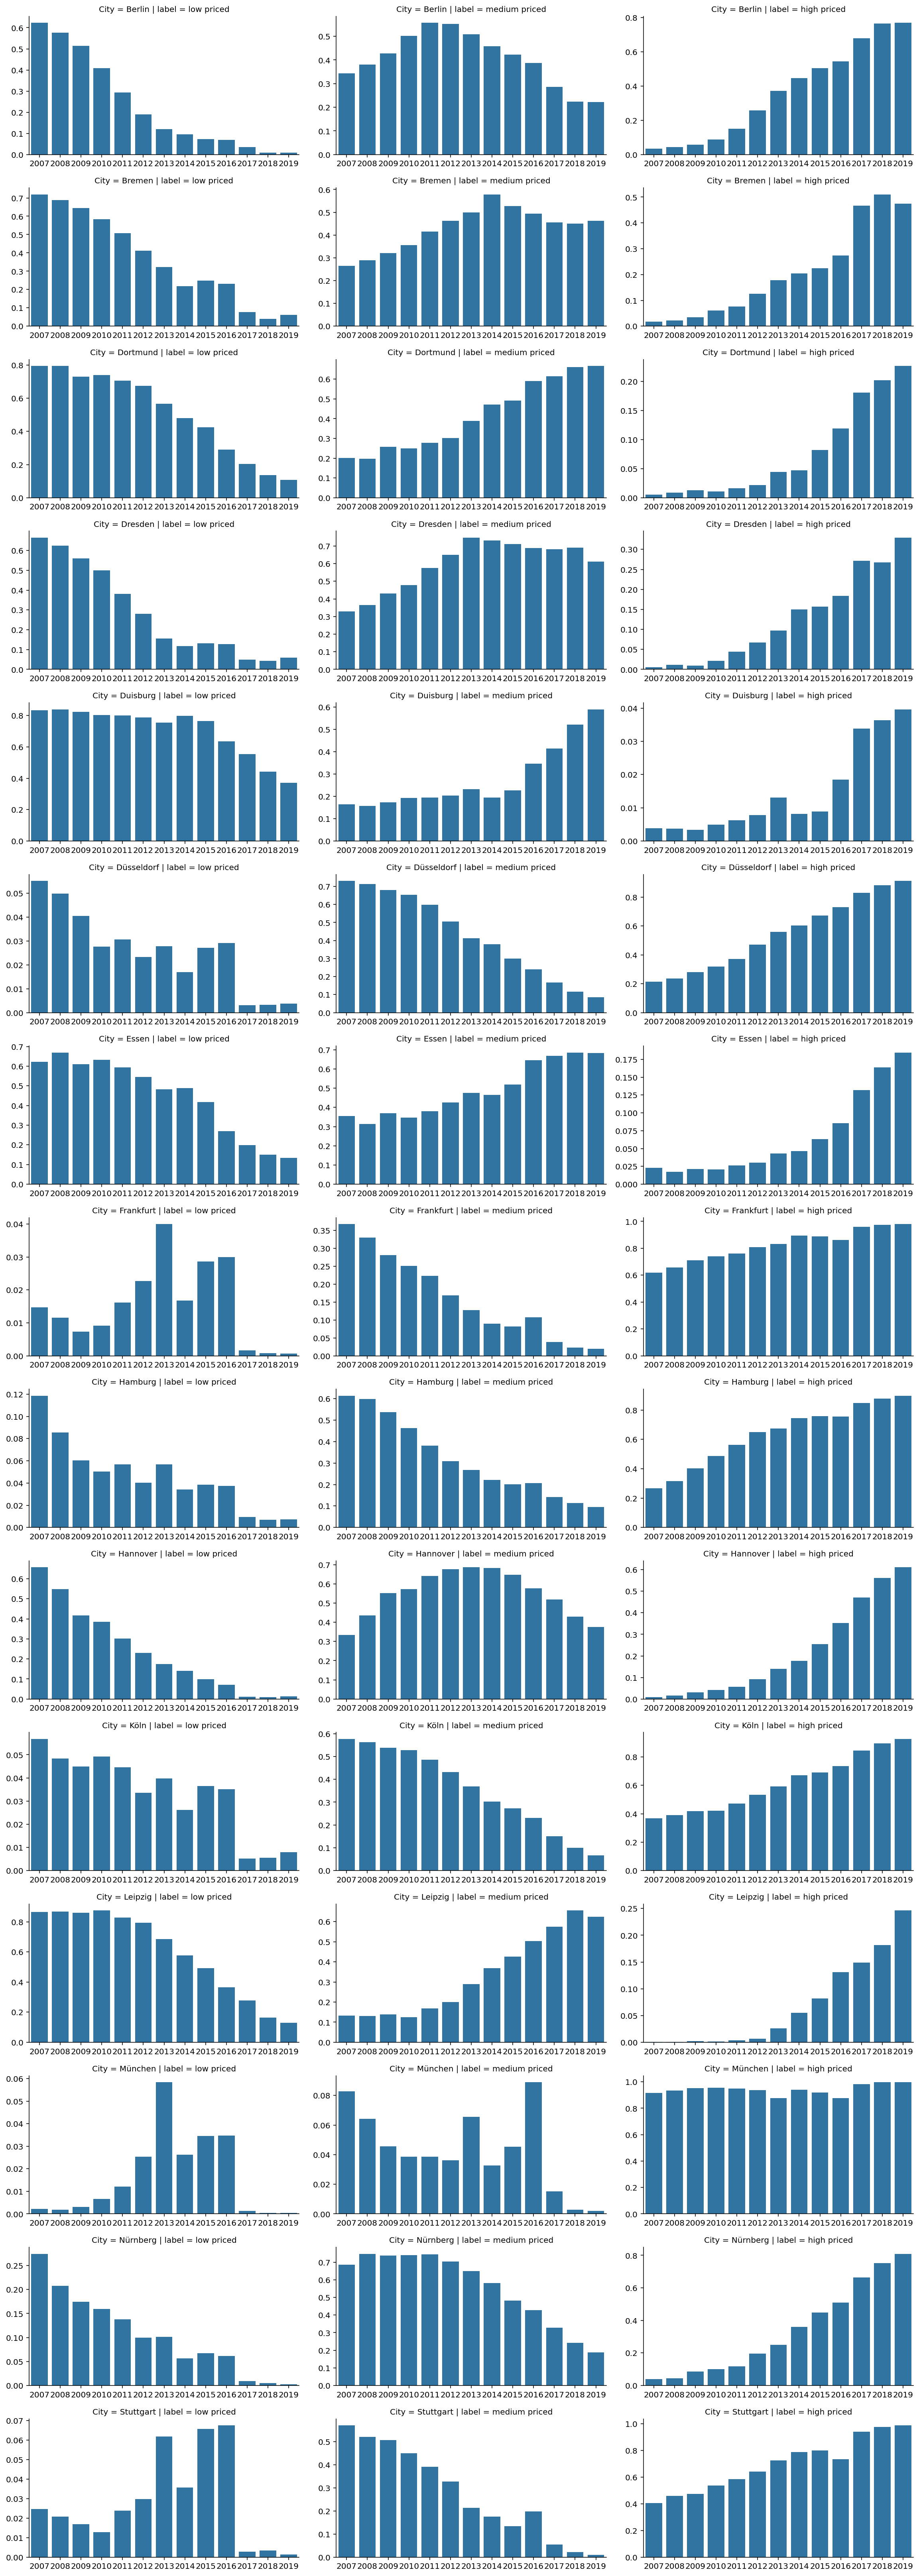

In [60]:
g = sns.FacetGrid(data=summary, col='label', row='City', sharex=False, sharey=False, col_order=label_order, height=3, aspect=1.8)
g.map_dataframe(sns.barplot, x='year', y='label_ratio', order=range(2007,2020,1))

### Changes in rent per sqm 

In [57]:
labels = df.label.unique()

In [58]:
changes = pd.DataFrame()

for label in labels:
    change_df = summary.query('label == @label').pivot(index='City', columns='year', values='rent_sqm_mean').fillna(method = 'bfill', axis=1)
    changes = changes.append(pd.Series(change_df[2019] / change_df[2007] * 100 - 100, name=label))
    

In [59]:
changes = changes.T.reset_index().melt(id_vars='index')

In [61]:
changes.columns=['City', 'label', 'percentual_change_rent_sqm']

In [62]:
changes = changes.sort_values(by=['label', 'percentual_change_rent_sqm'], ascending = False)

<Figure size 864x648 with 0 Axes>

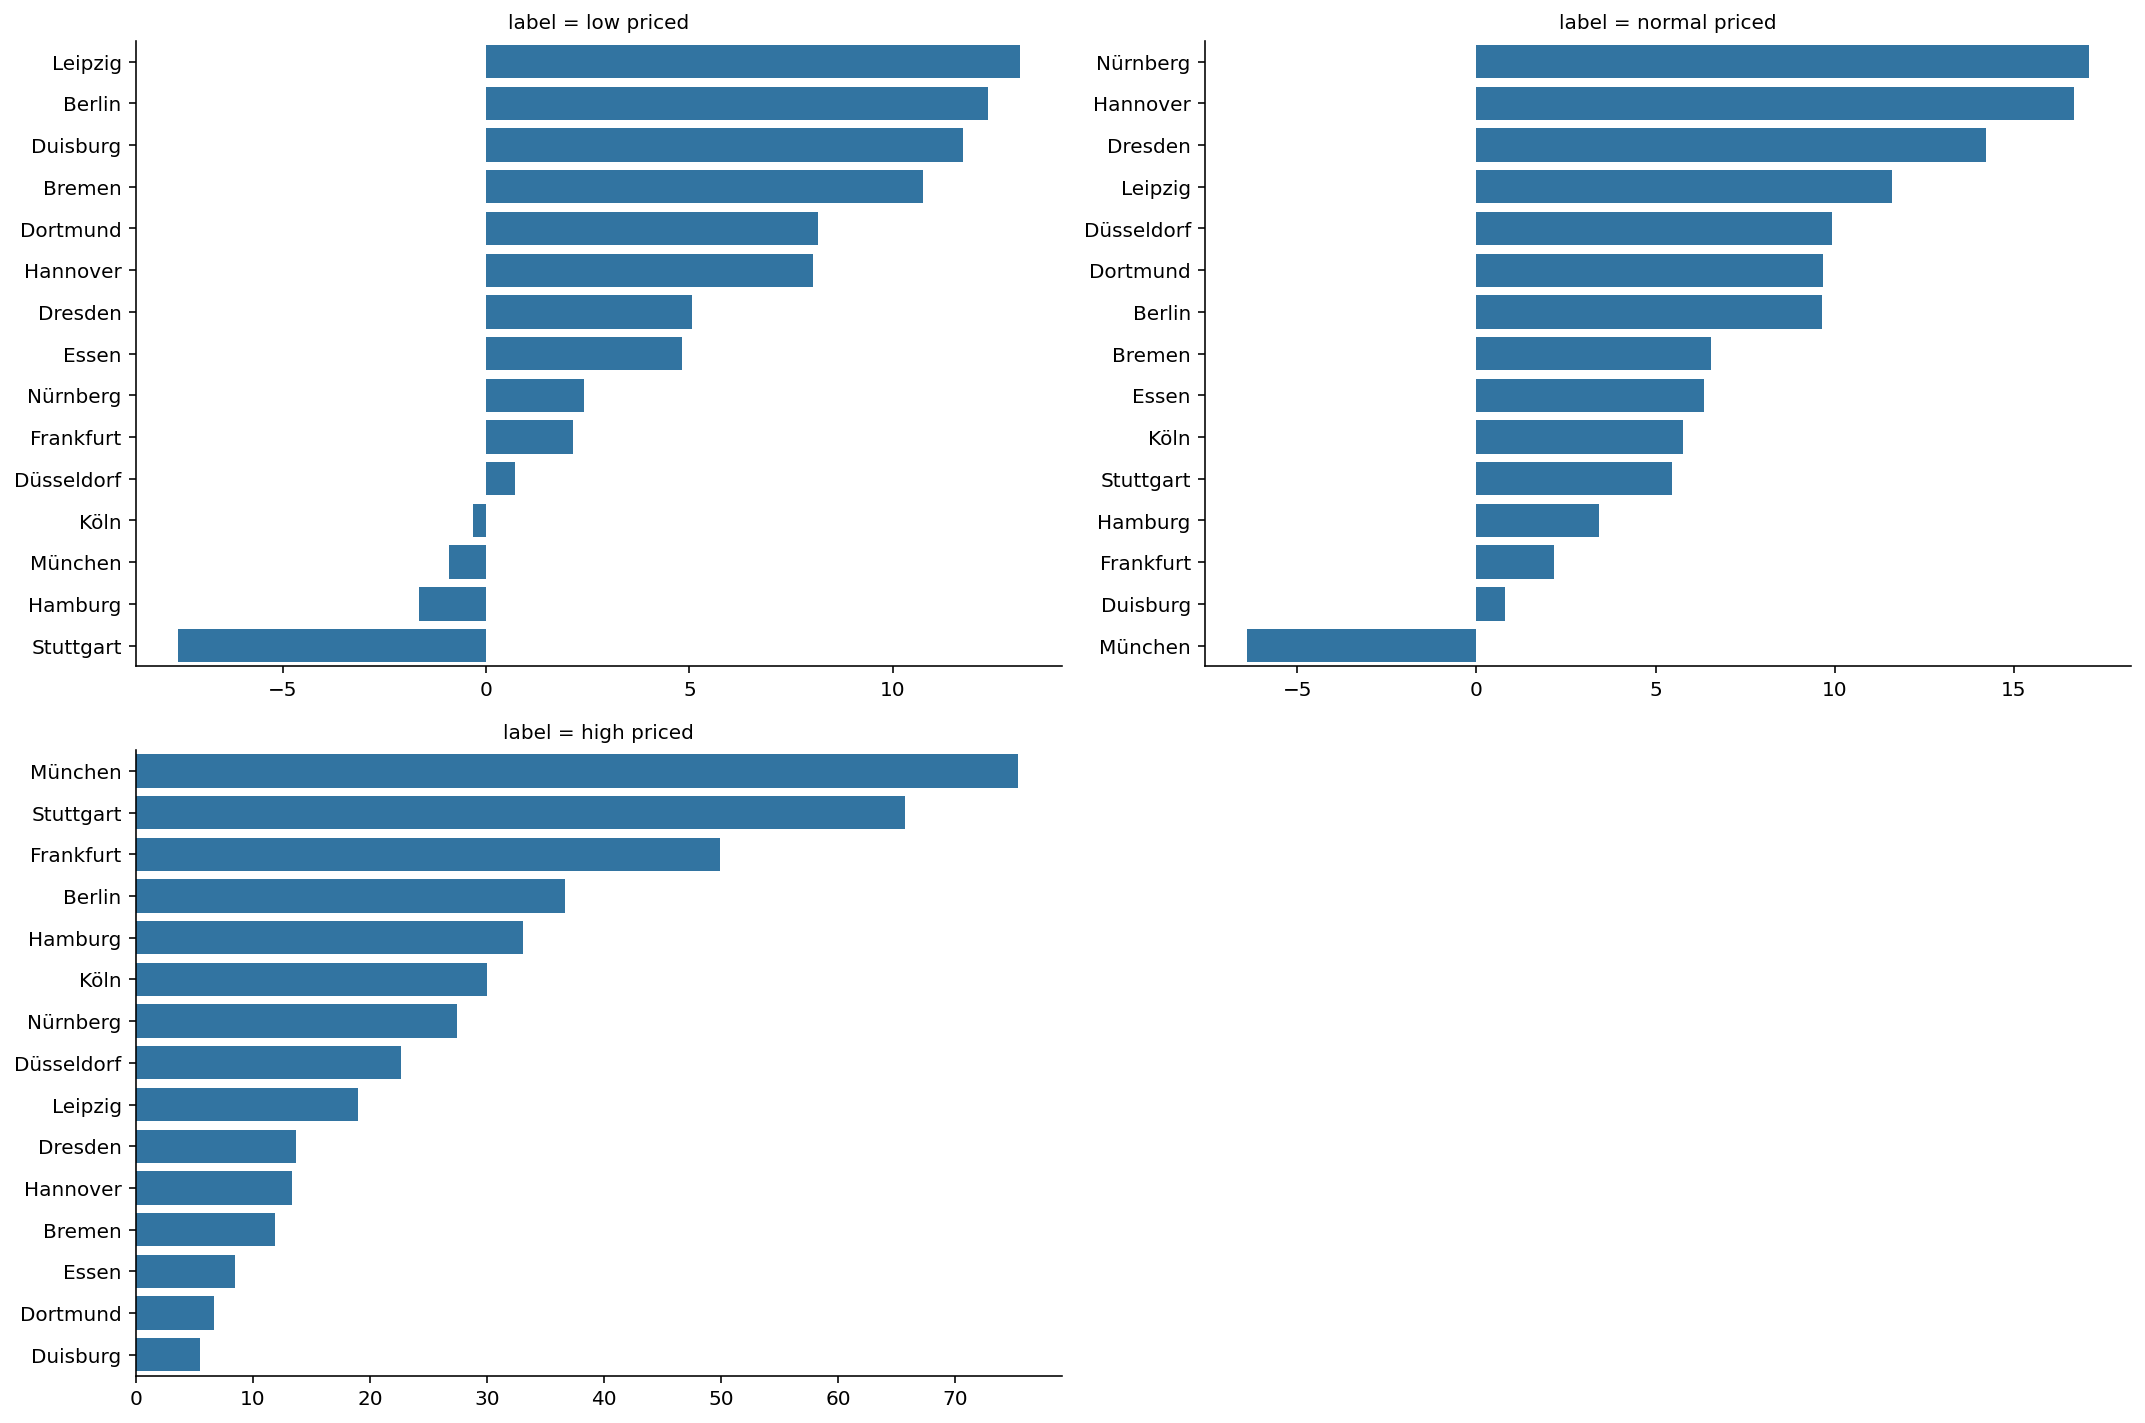

In [63]:
g = sns.FacetGrid(data=changes, col='label', col_wrap=2, sharey=False, sharex=False, col_order=label_order, height=5, aspect=1.5)
plt.figure(figsize=(12,9))
g.map_dataframe(sns.barplot, x='percentual_change_rent_sqm', y='City')


### Outcome
* 

In [67]:
min_changes['min_max'] = 'min'
max_changes['min_max'] = 'max'



In [68]:
min_changes

City          label  percentual_change_rent_sqm min_max
34   Duisburg    high priced                    5.496580     min
29  Stuttgart     low priced                   -7.581008     min
12    München  normal priced                   -6.403957     min

In [70]:
min_max = pd.concat([min_changes, max_changes], axis=0)

In [71]:
min_max.City = min_max.City + '_' + min_max.min_max



In [72]:
cities = min_max.City.values
min_max.sort_values(by=['min_max', 'label'], ascending=False)


City          label  percentual_change_rent_sqm min_max
12    München_min  normal priced                   -6.403957     min
29  Stuttgart_min     low priced                   -7.581008     min
34   Duisburg_min    high priced                    5.496580     min
13   Nürnberg_max  normal priced                   17.088175     max
26    Leipzig_max     low priced                   13.118422     max
42    München_max    high priced                   75.319223     max

In [73]:
cities=['Dortmund', 'Duisburg', 'Duisburg', 'Duisburg', 'München', 'Stuttgart', 'Berlin', 'München', 'Stuttgart', 'Nürnberg']

Text(0.5, 1.0, 'Minimum and maximum price changes of appartments and the corresponding cities')

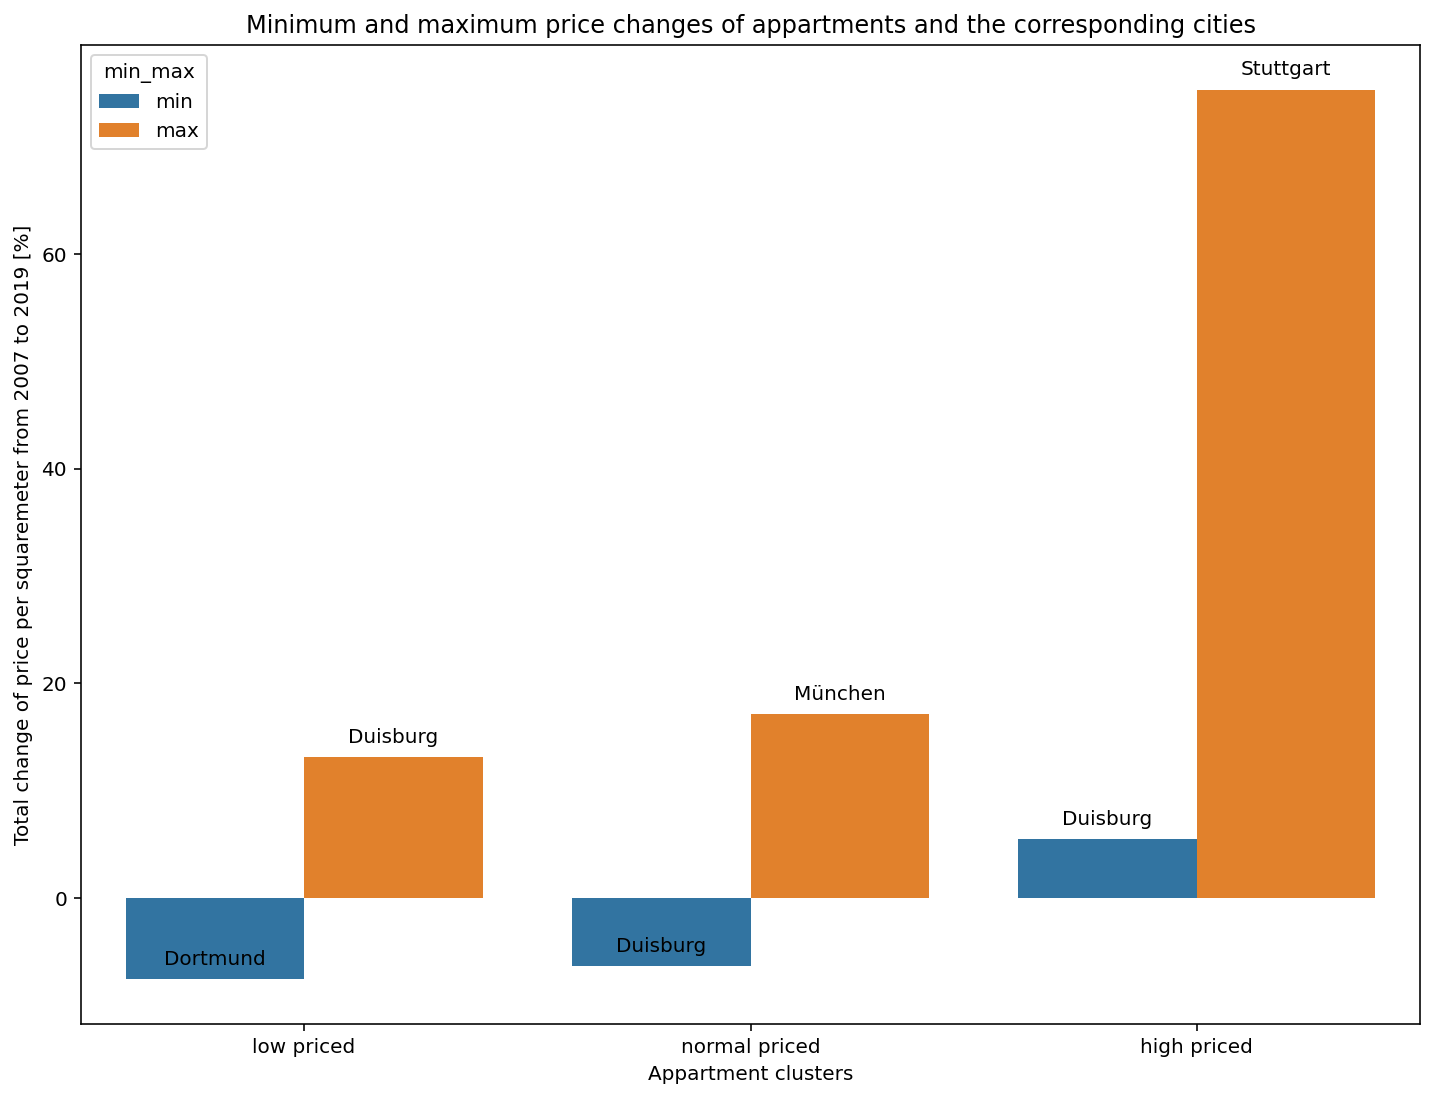

In [75]:
plt.figure(figsize=(12,9))
splot = sns.barplot(data=min_max, x='label', y='percentual_change_rent_sqm', hue='min_max', order=label_order)
for i, p in enumerate(splot.patches):
    #print(cities[i], format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()))
    splot.annotate(cities[i], (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.xlabel('Appartment clusters')
plt.ylabel('Total change of price per squaremeter from 2007 to 2019 [%]')
plt.title('Minimum and maximum price changes of appartments and the corresponding cities')

#format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())

### Changes in wohnflaeche

In [57]:
labels = df.label.unique()

In [79]:
changes = pd.DataFrame()

for label in labels:
    change_df = summary.query('label == @label').pivot(index='City', columns='year', values='wohnflaeche_mean').fillna(method = 'bfill', axis=1)
    changes = changes.append(pd.Series(change_df[2019] / change_df[2007] * 100 - 100, name=label))
    

In [80]:
changes = changes.T.reset_index().melt(id_vars='index')

In [83]:
changes.columns=['City', 'label', 'percentual_change_wohnflaeche']

In [84]:
changes = changes.sort_values(by=['label', 'percentual_change_wohnflaeche'], ascending = False)

<Figure size 864x648 with 0 Axes>

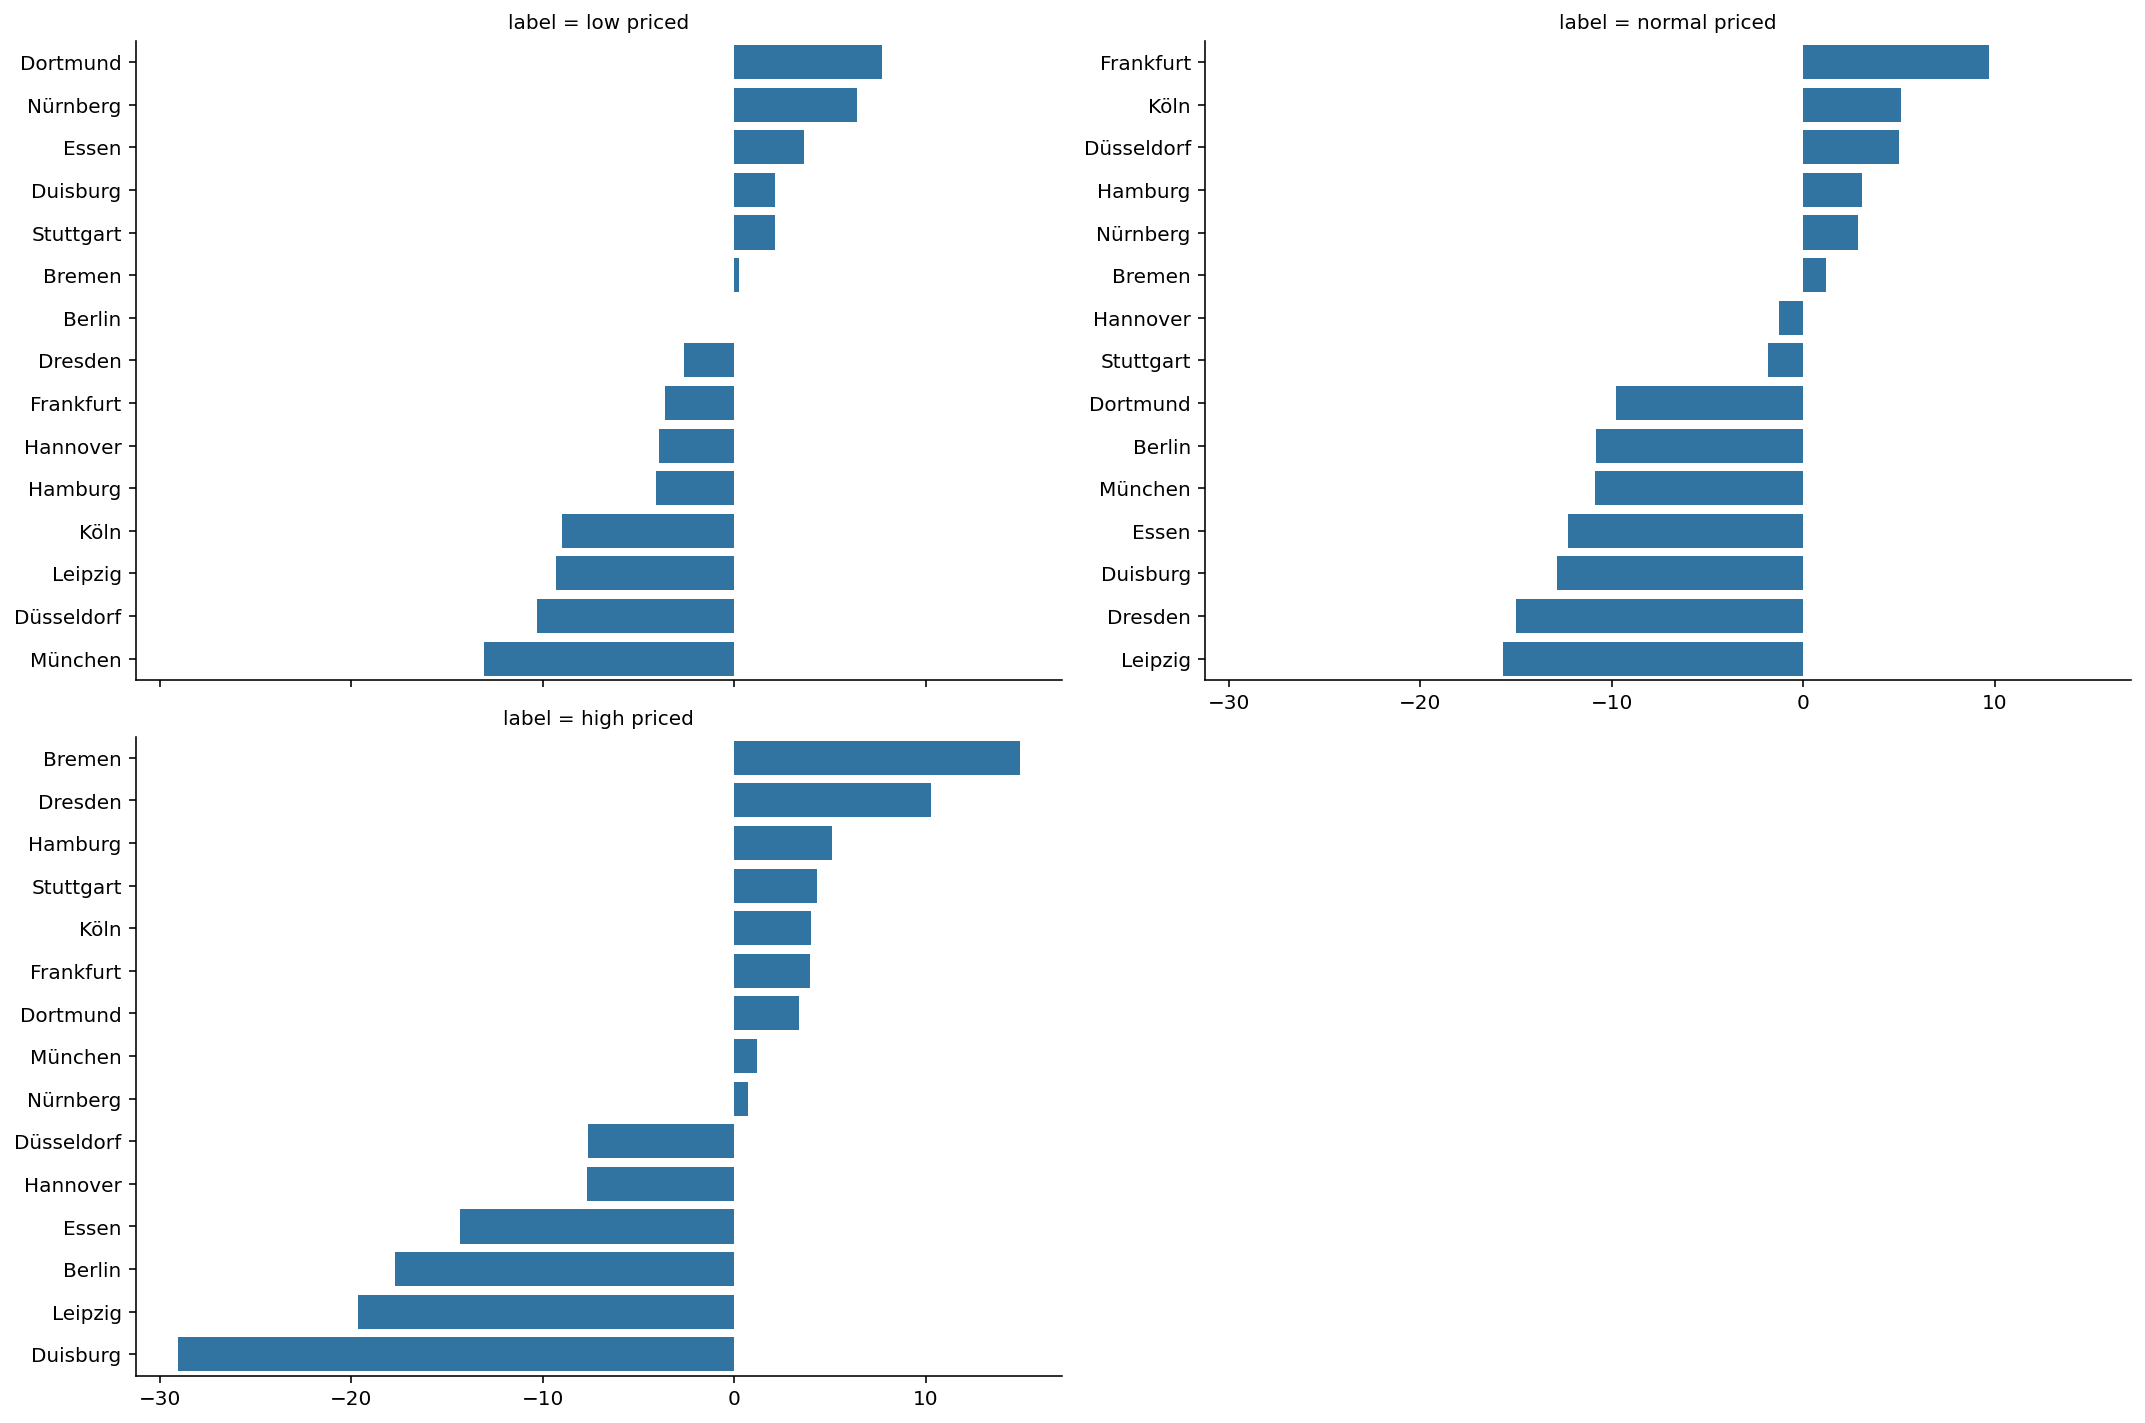

In [96]:
g = sns.FacetGrid(data=changes, col='label', col_wrap=2, sharey=False, sharex=True, col_order=label_order, height=5, aspect=1.5)
plt.figure(figsize=(12,9))
g.map_dataframe(sns.barplot, x='percentual_change_wohnflaeche', y='City')


In [87]:
min_changes['min_max'] = 'min'
max_changes['min_max'] = 'max'



In [88]:
min_changes

City          label  percentual_change_rent_sqm min_max
34   Duisburg    high priced                    5.496580     min
29  Stuttgart     low priced                   -7.581008     min
12    München  normal priced                   -6.403957     min

In [89]:
min_max = pd.concat([min_changes, max_changes], axis=0)

In [90]:
min_max.City = min_max.City + '_' + min_max.min_max



In [91]:
cities = min_max.City.values
min_max.sort_values(by=['min_max', 'label'], ascending=False)


City          label  percentual_change_rent_sqm min_max
12    München_min  normal priced                   -6.403957     min
29  Stuttgart_min     low priced                   -7.581008     min
34   Duisburg_min    high priced                    5.496580     min
13   Nürnberg_max  normal priced                   17.088175     max
26    Leipzig_max     low priced                   13.118422     max
42    München_max    high priced                   75.319223     max

In [92]:
cities=['Dortmund', 'Duisburg', 'Duisburg', 'Duisburg', 'München', 'Stuttgart', 'Berlin', 'München', 'Stuttgart', 'Nürnberg']

Text(0.5, 1.0, 'Minimum and maximum wohnflaeche changes of appartments and the corresponding cities')

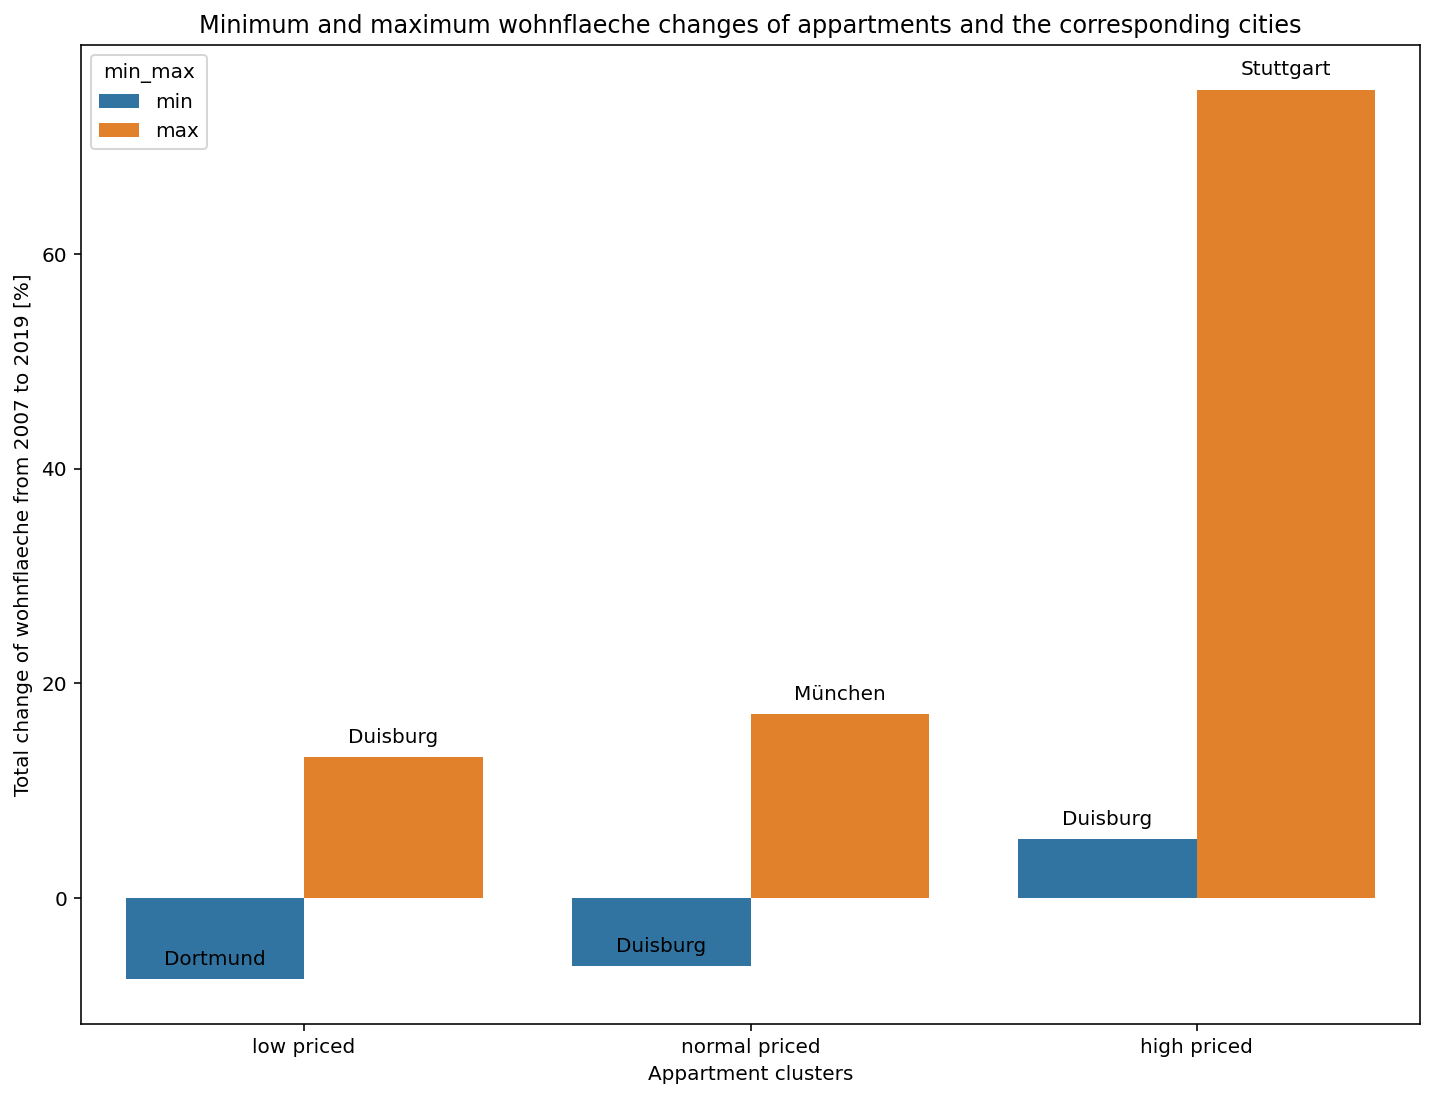

In [95]:
plt.figure(figsize=(12,9))
splot = sns.barplot(data=min_max, x='label', y='percentual_change_rent_sqm', hue='min_max', order=label_order)
for i, p in enumerate(splot.patches):
    #print(cities[i], format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()))
    splot.annotate(cities[i], (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.xlabel('Appartment clusters')
plt.ylabel('Total change of wohnflaeche from 2007 to 2019 [%]')
plt.title('Minimum and maximum wohnflaeche changes of appartments and the corresponding cities')

#format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())

### Wie hat sich das Angebot der Cluster verändert

In [98]:
summary_ausstatung.head()

City  year        label ausstattung  mietekalt_mean  wohnflaeche_mean  \
0  Berlin  2007  high priced     Gehoben      853.242903         81.890000   
1  Berlin  2007  high priced       Luxus     1064.666667        104.608333   
2  Berlin  2007  high priced      Normal      912.900000         96.124445   
3  Berlin  2007  high priced   Unbekannt      849.105702         86.032726   
4  Berlin  2007   low priced     Einfach      269.591154         59.988846   

   baujahr_mean  rent_sqm_mean  laufzeittage_mean  anzahletagen_mean  \
0   1945.148148      10.418878          48.516129           5.464286   
1   1932.500000      10.148727          84.000000           4.666667   
2   1955.125000       9.454166          63.444444           5.250000   
3   1957.341243       9.875049          36.988147           4.520588   
4   1937.800000       4.588611          40.346154           6.000000   

   zimmeranzahl_mean  schlafzimmer_mean  label_ratio  
0           2.532258           1.583333     0.104027  
1           2.750000           1.500000     0.428571  
2           2.722222           1.444444     0.017928  
3           2.631940           1.629356     0.032716  
4           1.923077           1.250000     0.764706

In [114]:
cluster_count = df.groupby(['City', 'year', 'label']).size().reset_index(name='count')

In [150]:
cluster_count.head()

City  year          label  count
0  Berlin  2007    high priced   1649
1  Berlin  2007     low priced  31348
2  Berlin  2007  normal priced  16848
3  Berlin  2008    high priced   2117
4  Berlin  2008     low priced  29239

In [158]:
cluster_count.query('label == "normal priced"').pivot(index='City', columns='year', values='count')

year         2007   2008   2009   2010   2011   2012   2013   2014   2015  \
City                                                                        
Berlin      16848  18865  21123  24773  27690  27749  25847  23078  21515   
Bremen       1807   2006   2211   2482   2847   3183   3427   4012   3661   
Dortmund     1391   1346   1756   1699   1906   2048   2689   3233   3385   
Dresden      4787   5348   6170   6926   8432   9744  11127  11128  10671   
Duisburg     1111   1033   1174   1291   1301   1394   1546   1294   1487   
Düsseldorf  10951  10778  10343   9912   9180   7709   6264   5768   4638   
Essen        2413   2118   2532   2381   2585   2873   3278   3237   3521   
Frankfurt    5672   5115   4276   3896   3414   2621   1952   1381   1266   
Hamburg      9366   9037   8131   6998   5745   4699   4063   3394   3079   
Hannover     2282   2999   3785   3955   4449   4731   4679   4727   4567   
Köln         8717   8592   8219   8016   7368   6616   5620   4568   4166   
Leipzig      1956   1890   2011   1800   2465   2943   4232   5436   6345   
München      1301   1003    713    602    601    554    983    485    682   
Nürnberg     4738   5189   5078   5056   5203   4900   4553   4098   3405   
Stuttgart    4077   3710   3574   3202   2778   2333   1534   1250    942   

year         2016   2017   2018   2019  
City                                    
Berlin      19728  14479  11390  11186  
Bremen       3452   3199   3178   3250  
Dortmund     4103   4279   4607   4618  
Dresden     10315  10309  10415   9291  
Duisburg     2370   2792   3529   4110  
Düsseldorf   3691   2602   1812   1327  
Essen        4444   4672   4753   4719  
Frankfurt    1637    593    359    295  
Hamburg      3138   2153   1740   1470  
Hannover     4009   3641   3037   2695  
Köln         3566   2301   1545   1040  
Leipzig      7532   8716   9791   9275  
München      1329    236     45     31  
Nürnberg     3002   2334   1735   1367  
Stuttgart    1371    394    155     71

In [165]:
changes = pd.DataFrame()

for label in labels:
    change_df = cluster_count.query('label == @label').pivot(index='City', columns='year', values='count')
    changes = changes.append(pd.Series(change_df[2019] / change_df[2007] * 100 - 100, name=label))
    
    

In [166]:
changes = changes.T.reset_index().melt(id_vars='index')

In [167]:
changes.columns=['City', 'label', 'percentual_change_count']

In [168]:
changes = changes.sort_values(by=['label', 'percentual_change_count'], ascending = False)

In [169]:
changes

City          label  percentual_change_count
11     Leipzig  normal priced               374.182004
4     Duisburg  normal priced               269.936994
2     Dortmund  normal priced               231.991373
6        Essen  normal priced                95.565686
3      Dresden  normal priced                94.088155
1       Bremen  normal priced                79.856115
9     Hannover  normal priced                18.098160
0       Berlin  normal priced               -33.606363
13    Nürnberg  normal priced               -71.148164
8      Hamburg  normal priced               -84.304933
5   Düsseldorf  normal priced               -87.882385
10        Köln  normal priced               -88.069290
7    Frankfurt  normal priced               -94.799013
12     München  normal priced               -97.617218
14   Stuttgart  normal priced               -98.258523
19    Duisburg     low priced               -54.217896
21       Essen     low priced               -78.509964
27     München     low priced               -79.411765
26     Leipzig     low priced               -84.854487
17    Dortmund     low priced               -86.211180
25        Köln     low priced               -86.307520
18     Dresden     low priced               -90.899123
16      Bremen     low priced               -91.261563
20  Düsseldorf     low priced               -93.192488
23     Hamburg     low priced               -93.998909
29   Stuttgart     low priced               -94.565217
22   Frankfurt     low priced               -95.884774
24    Hannover     low priced               -97.865459
15      Berlin     low priced               -98.535792
28    Nürnberg     low priced               -99.144008
41     Leipzig    high priced             51785.714286
39    Hannover    high priced              6891.803279
33     Dresden    high priced              5435.227273
32    Dortmund    high priced              4584.848485
31      Bremen    high priced              2651.694915
30      Berlin    high priced              2220.012129
43    Nürnberg    high priced              1973.333333
34    Duisburg    high priced              1180.952381
36       Essen    high priced               709.740260
35  Düsseldorf    high priced               340.850515
38     Hamburg    high priced               239.803625
40        Köln    high priced               156.622024
44   Stuttgart    high priced               147.649803
37   Frankfurt    high priced                58.378437
42     München    high priced                 9.623278

<Figure size 864x648 with 0 Axes>

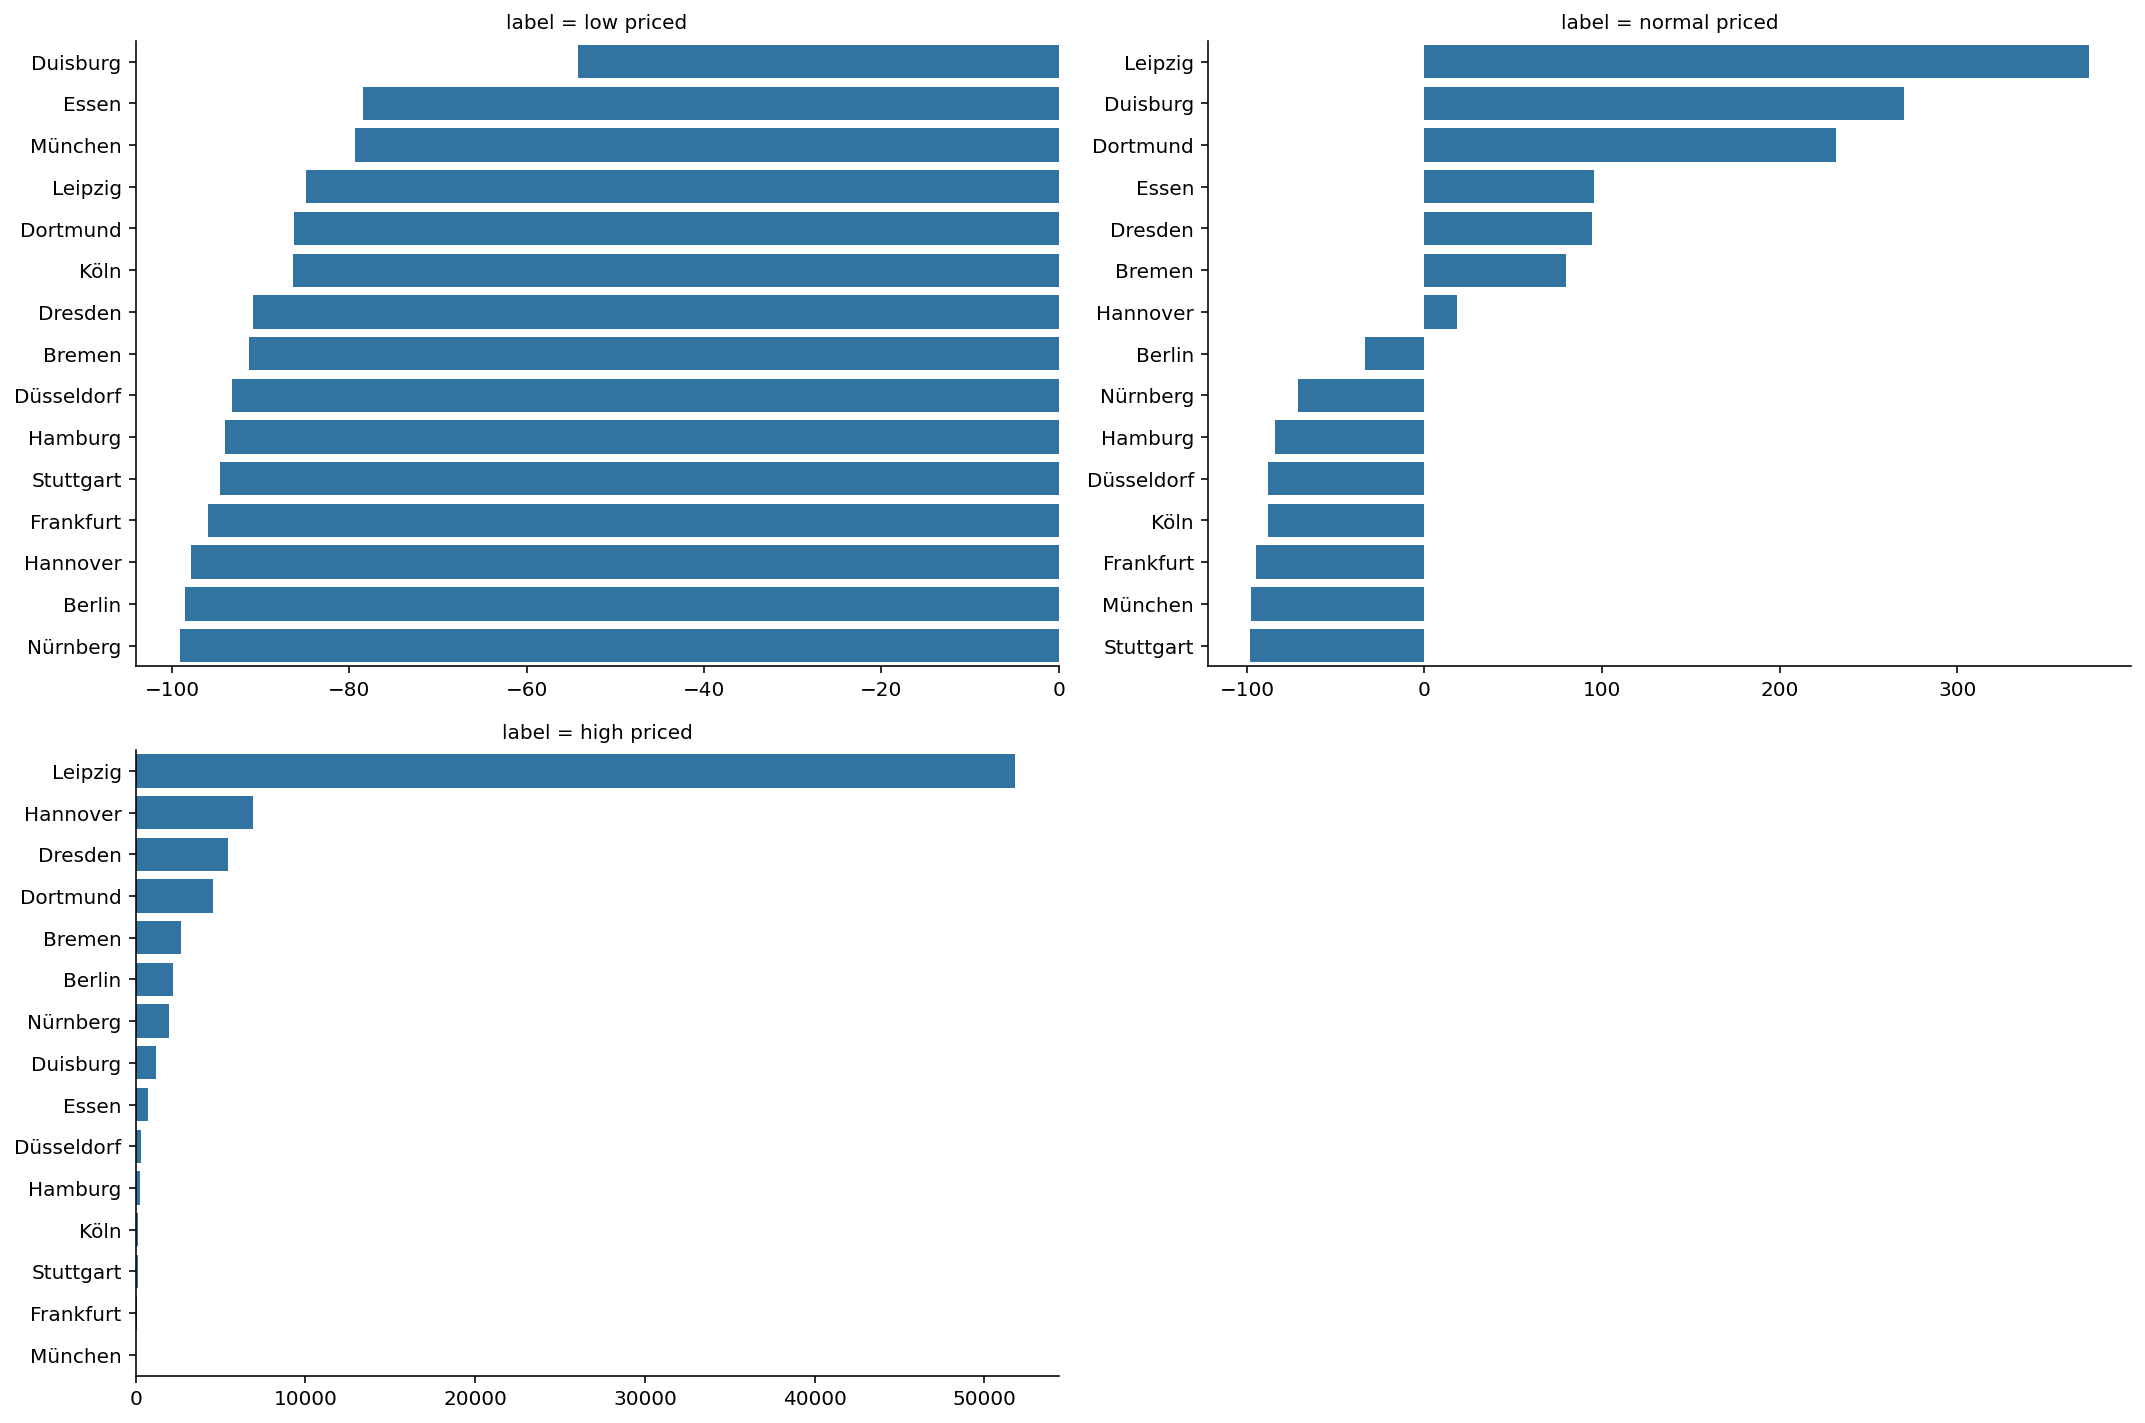

In [171]:
g = sns.FacetGrid(data=changes, col='label', col_wrap=2, sharey=False, sharex=False, col_order=label_order, height=5, aspect=1.5)
plt.figure(figsize=(12,9))
g.map_dataframe(sns.barplot, x='percentual_change_count', y='City')


In [152]:
cluster_count
#.pivot(^index='City', columns='year', values='count')

City  year          label  count
0       Berlin  2007    high priced   1649
1       Berlin  2007     low priced  31348
2       Berlin  2007  normal priced  16848
3       Berlin  2008    high priced   2117
4       Berlin  2008     low priced  29239
..         ...   ...            ...    ...
580  Stuttgart  2018     low priced     24
581  Stuttgart  2018  normal priced    155
582  Stuttgart  2019    high priced   6902
583  Stuttgart  2019     low priced     10
584  Stuttgart  2019  normal priced     71

[585 rows x 4 columns]

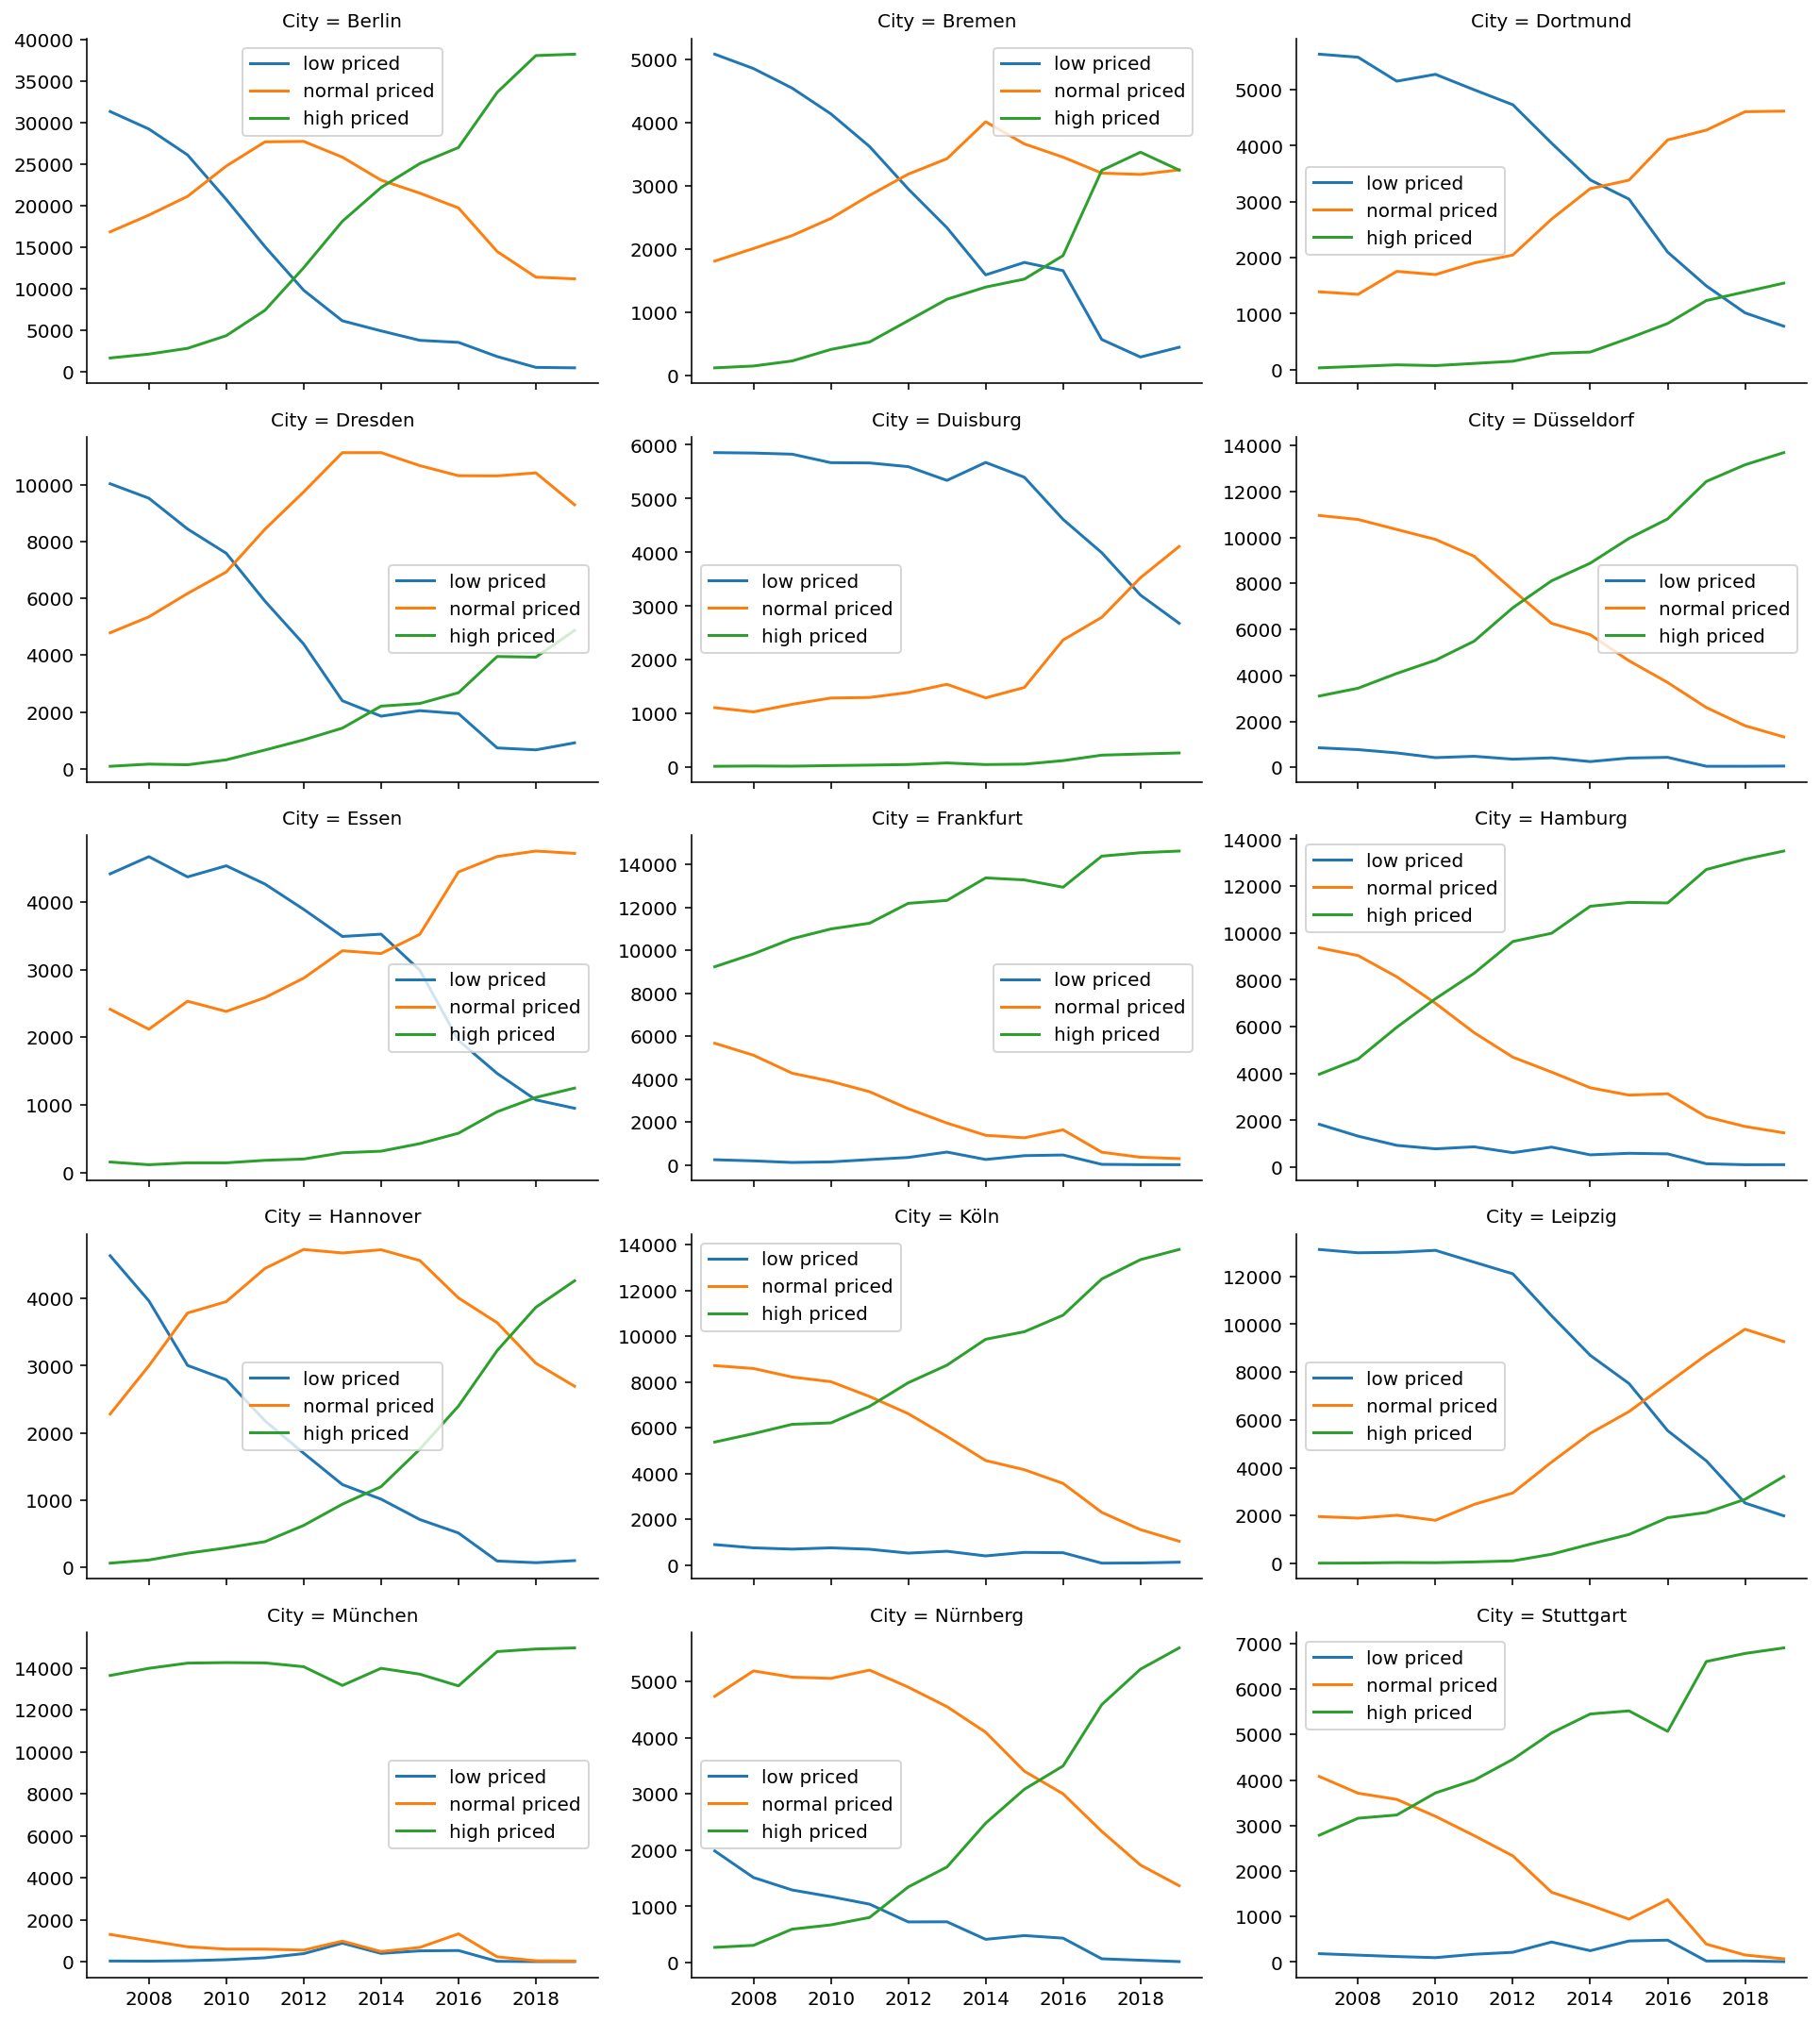

In [119]:
g = sns.FacetGrid(data=cluster_count, col='City', col_wrap=3, height=3, aspect=1.5, sharey=False)
g.map_dataframe(sns.lineplot, x='year', y='count', hue='label', hue_order=label_order)

for ax in g.axes.ravel():
    ax.legend()



In [ ]:
df.to_pickle('data/rent_clustering_done.pkl')

In [ ]:
min_changes

In [ ]:
134000 / 356 / 4